In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('kaggle_phishing_email/Enron.csv')

Data Analysis

In [8]:
print("1. Dataset Shape:", df.shape)

print(df.dtypes)


1. Dataset Shape: (29767, 3)
subject    object
body       object
label       int64
dtype: object


In [9]:
print("\n2. First few rows:")
print(df.head())


2. First few rows:
                                      subject  \
0                   hpl nom for may 25 , 2001   
1            re : nom / actual vols for 24 th   
2  enron actuals for march 30 - april 1 , 201   
3                   hpl nom for may 30 , 2001   
4                   hpl nom for june 1 , 2001   

                                                body  label  
0  ( see attached file : hplno 525 . xls )\r\n- h...      0  
1  - - - - - - - - - - - - - - - - - - - - - - fo...      0  
2  estimated actuals\r\nmarch 30 , 2001\r\nno flo...      0  
3  ( see attached file : hplno 530 . xls )\r\n- h...      0  
4  ( see attached file : hplno 601 . xls )\r\n- h...      0  


In [10]:
print("\n3. Dataset Info:")
print(df.info())


3. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  29569 non-null  object
 1   body     29767 non-null  object
 2   label    29767 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 697.8+ KB
None


In [11]:
print("\n4. Basic Statistics:")
df.describe()



4. Basic Statistics:


,label
count,29767.000000
mean,0.469513
std,0.499078
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
print("\n5. Missing Values:")
df.isnull().sum()



5. Missing Values:


subject    198
body         0
label        0
dtype: int64

In [13]:
df.columns


Index(['subject', 'body', 'label'], dtype='object')

In [14]:
df.iloc[0,1]

'( see attached file : hplno 525 . xls )\r\n- hplno 525 . xls'

/Users/naveenaganesan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/naveenaganesan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/naveenaganesan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


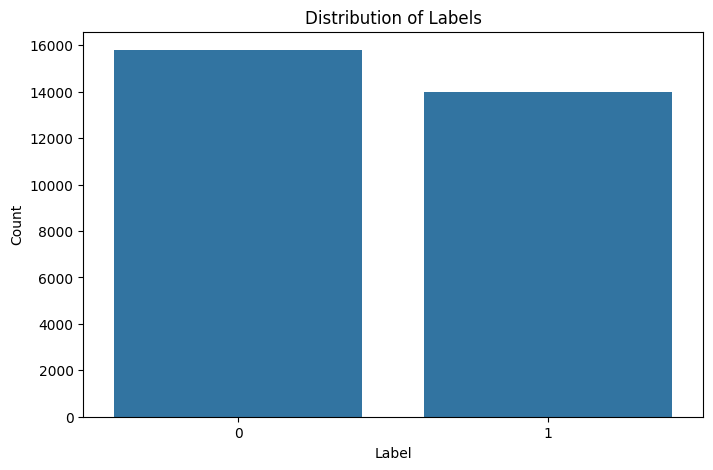

In [15]:
plt.figure(figsize=(8, 5))
label_dist = df['label'].value_counts()
sns.barplot(x=label_dist.index, y=label_dist.values)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [16]:
print("\n7. Label Distribution Percentages:")
print(df['label'].value_counts(normalize=True) * 100)


7. Label Distribution Percentages:
label
0    53.048678
1    46.951322
Name: proportion, dtype: float64


In [17]:
print("\n8. Sample Email from Class 0 (Non-phishing):")
print(df[df['label'] == 0][['subject', 'body']].iloc[0])
print("\nSample Email from Class 1 (Phishing):")
print(df[df['label'] == 1][['subject', 'body']].iloc[0])


8. Sample Email from Class 0 (Non-phishing):
subject                            hpl nom for may 25 , 2001
body       ( see attached file : hplno 525 . xls )\r\n- h...
Name: 0, dtype: object

Sample Email from Class 1 (Phishing):
subject    d - link dwl - g 510 802 . 11 g wireless pci l...
body       $ 39 . 85 dwl - g 510\r\nhigh speed\r\n2 . 4\r...
Name: 3501, dtype: object


Text Length Analysis

In [18]:
# 1. Calculate various length metrics
df['subject_length'] = df['subject'].str.len()
df['body_length'] = df['body'].str.len()
df['subject_word_count'] = df['subject'].str.split().str.len()
df['body_word_count'] = df['body'].str.split().str.len()

In [19]:
# 2. Basic statistics of text lengths
print("Text Length Statistics:")
length_stats = df[['subject_length', 'body_length', 
                   'subject_word_count', 'body_word_count']].describe()
print(length_stats)

Text Length Statistics:
       subject_length    body_length  subject_word_count  body_word_count
count    29569.000000   29767.000000        29569.000000     29767.000000
mean        34.301532    1487.822421            7.147452       303.219068
std         47.831388    4202.647954           11.198096       829.776123
min          1.000000       1.000000            1.000000         1.000000
25%         19.000000     332.000000            4.000000        67.000000
50%         30.000000     706.000000            6.000000       150.000000
75%         44.000000    1565.000000            9.000000       328.000000
max       7170.000000  230120.000000         1665.000000     45448.000000


In [20]:
# 3. Length statistics by class
print("\nText Length Statistics by Class:")
print(df.groupby('label')[['subject_length', 'body_length', 
                          'subject_word_count', 'body_word_count']].describe())



Text Length Statistics by Class:
      subject_length                                                       \
               count       mean        std  min   25%   50%   75%     max   
label                                                                       
0            15791.0  30.695269  21.472845  1.0  18.0  27.0  41.0   815.0   
1            13778.0  38.434678  65.952173  1.0  22.0  34.0  48.0  7170.0   

      body_length               ... subject_word_count          \
            count         mean  ...                75%     max   
label                           ...                              
0         15791.0  1627.513457  ...                8.0   162.0   
1         13976.0  1329.990341  ...               10.0  1665.0   

      body_word_count                                                    \
                count        mean          std  min   25%    50%    75%   
label                                                                     
0             15791.0  3

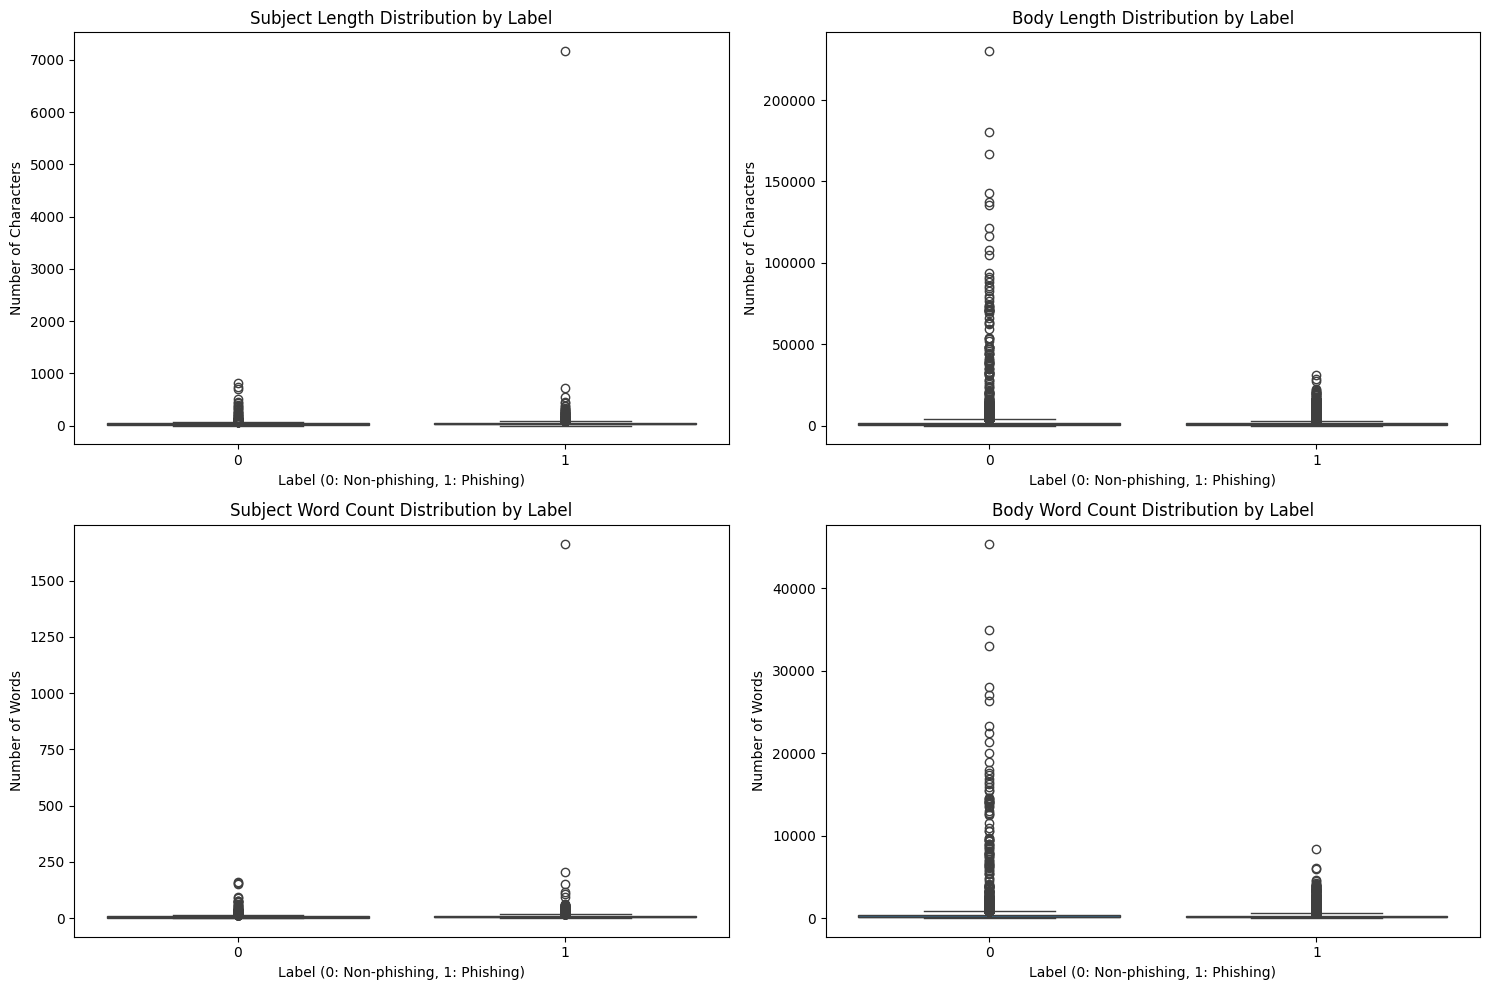

In [21]:
# 4. Visualizations

# 4.1 Distribution of lengths
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Subject length distribution
sns.boxplot(x='label', y='subject_length', data=df, ax=ax1)
ax1.set_title('Subject Length Distribution by Label')
ax1.set_xlabel('Label (0: Non-phishing, 1: Phishing)')
ax1.set_ylabel('Number of Characters')

# Body length distribution
sns.boxplot(x='label', y='body_length', data=df, ax=ax2)
ax2.set_title('Body Length Distribution by Label')
ax2.set_xlabel('Label (0: Non-phishing, 1: Phishing)')
ax2.set_ylabel('Number of Characters')

# Subject word count distribution
sns.boxplot(x='label', y='subject_word_count', data=df, ax=ax3)
ax3.set_title('Subject Word Count Distribution by Label')
ax3.set_xlabel('Label (0: Non-phishing, 1: Phishing)')
ax3.set_ylabel('Number of Words')

# Body word count distribution
sns.boxplot(x='label', y='body_word_count', data=df, ax=ax4)
ax4.set_title('Body Word Count Distribution by Label')
ax4.set_xlabel('Label (0: Non-phishing, 1: Phishing)')
ax4.set_ylabel('Number of Words')

plt.tight_layout()
plt.show()

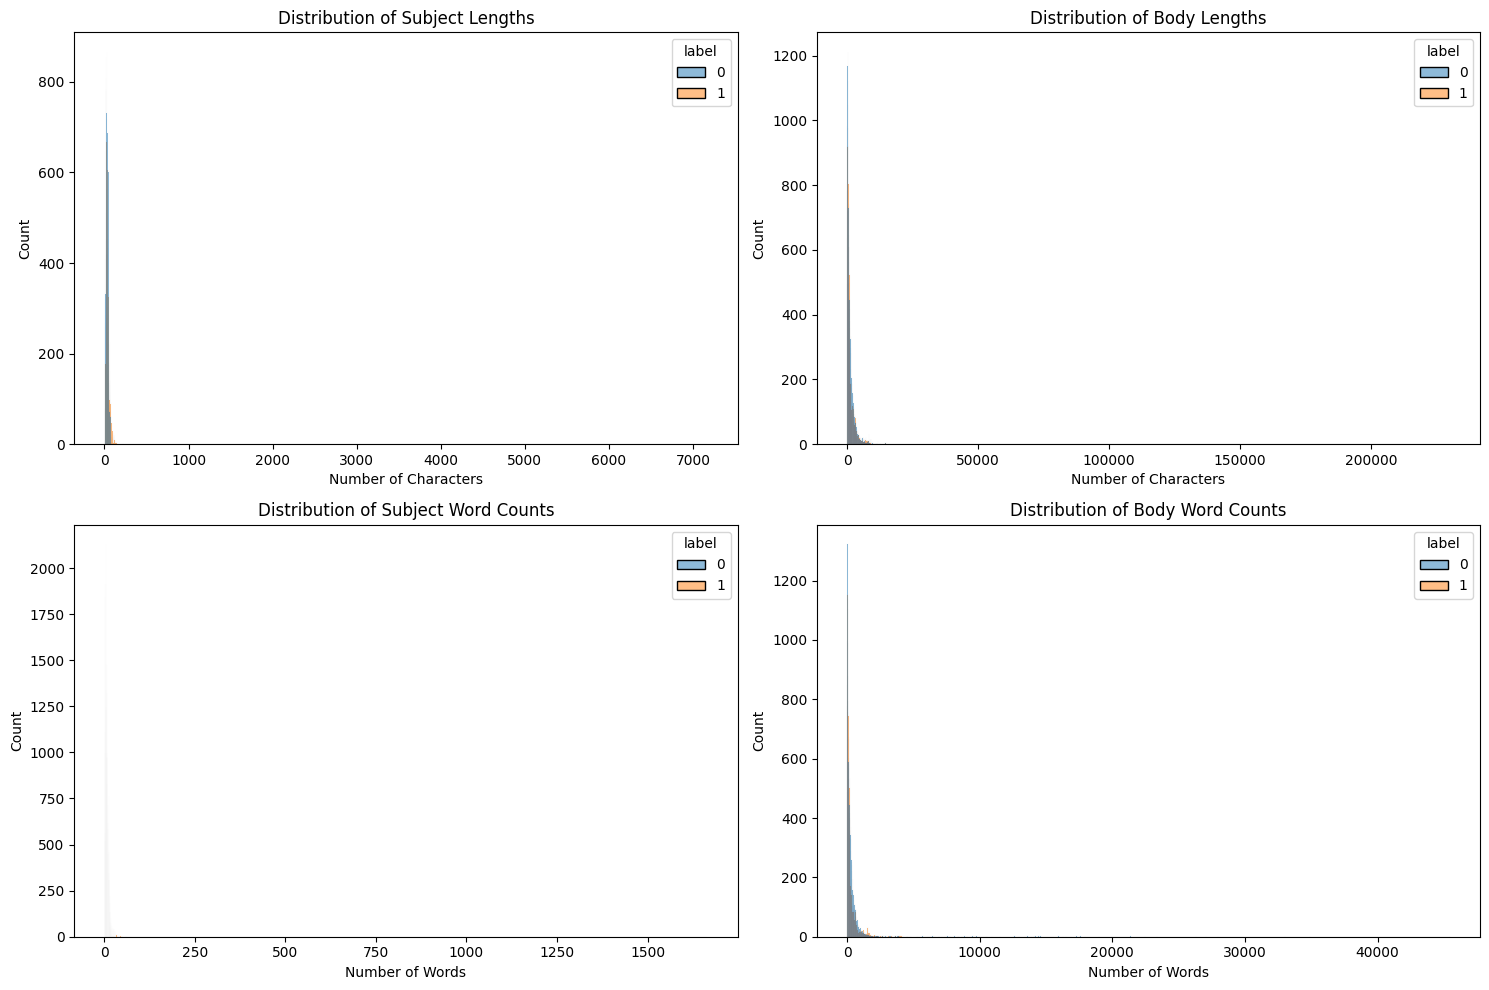

In [22]:
# 4.2 Histograms of lengths
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Subject length histogram
sns.histplot(data=df, x='subject_length', hue='label', multiple="layer", ax=ax1)
ax1.set_title('Distribution of Subject Lengths')
ax1.set_xlabel('Number of Characters')

# Body length histogram
sns.histplot(data=df, x='body_length', hue='label', multiple="layer", ax=ax2)
ax2.set_title('Distribution of Body Lengths')
ax2.set_xlabel('Number of Characters')

# Subject word count histogram
sns.histplot(data=df, x='subject_word_count', hue='label', multiple="layer", ax=ax3)
ax3.set_title('Distribution of Subject Word Counts')
ax3.set_xlabel('Number of Words')

# Body word count histogram
sns.histplot(data=df, x='body_word_count', hue='label', multiple="layer", ax=ax4)
ax4.set_title('Distribution of Body Word Counts')
ax4.set_xlabel('Number of Words')

plt.tight_layout()
plt.show()


In [23]:
# 5. Calculate summary statistics for extreme cases
print("\nTop 5 Longest Subjects:")
print(df.nlargest(5, 'subject_length')[['subject', 'subject_length', 'label']])

print("\nTop 5 Longest Bodies:")
print(df.nlargest(5, 'body_length')[['body', 'body_length', 'label']])



Top 5 Longest Subjects:
                                                 subject  subject_length  \
18956   34 gjq 3 2 o 7 t 4 nx 9 uqzyhq 2 9 r 2 dfwwcp...          7170.0   
13958  thanks for taking time this morning to go over...           815.0   
12810  hey guys , i would like to get with you to dis...           741.0   
22978  fw : 2 minutes to read what i have to say . . ...           727.0   
14283  cash hayslett , rod ; gunther , dave ; selzer ...           692.0   

       label  
18956      1  
13958      0  
12810      0  
22978      1  
14283      0  

Top 5 Longest Bodies:
                                                    body  body_length  label
11351  enron : a wake - up call\r\nthe wall street jo...       230120      0
11385  rival to buy enron , top energy trader , after...       180073      0
11352  fall of a power giant : bailout is unlikely if...       166813      0
11363  accounting peer review gets more scrutiny\r\nt...       142681      0
11358  enron and dyn

In [24]:
# 6. Calculate length-based features
df['subject_body_ratio'] = df['subject_length'] / df['body_length']
print("\nSubject-to-Body Length Ratio Statistics:")
print(df.groupby('label')['subject_body_ratio'].describe())


Subject-to-Body Length Ratio Statistics:
         count      mean       std       min       25%       50%       75%  \
label                                                                        
0      15791.0  0.125013  2.162438  0.000061  0.014649  0.031774  0.084094   
1      13778.0  0.109430  0.592972  0.000340  0.019608  0.049541  0.106464   

         max  
label         
0      247.0  
1       59.0  


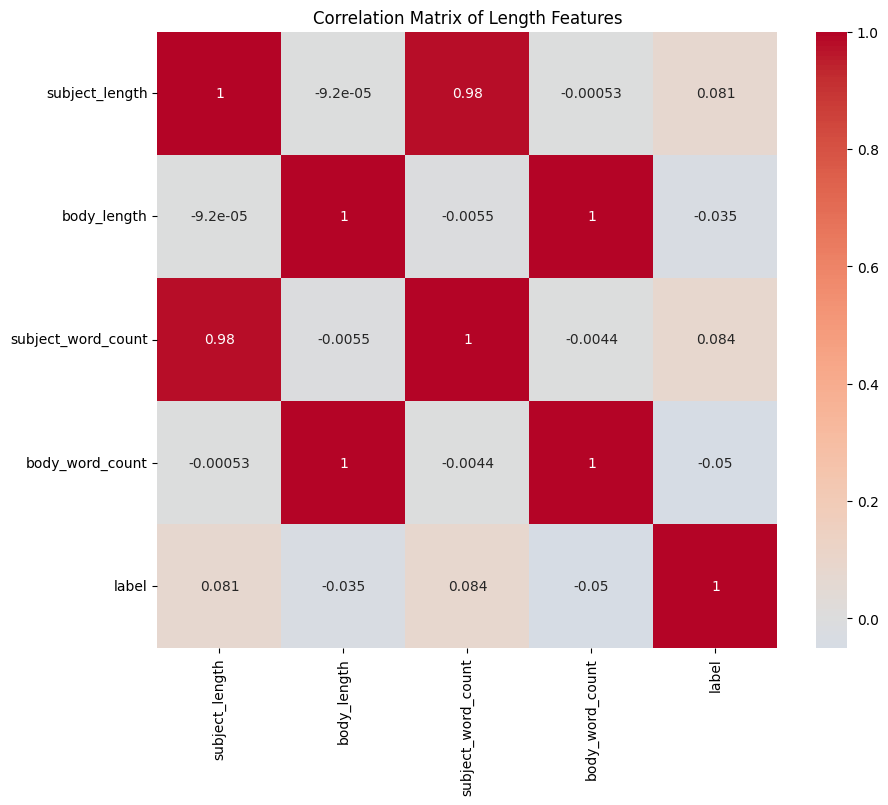

In [25]:
# 7. Correlation between lengths
correlation_matrix = df[['subject_length', 'body_length', 
                        'subject_word_count', 'body_word_count', 'label']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Length Features')
plt.show()

Text Characterisitics Analysis: Data cleaning and Feature extraction

In [26]:
import re
from collections import Counter


1. Dataset Shape: (29767, 10)

2. Missing Values:
subject                 0
body                    0
label                   0
subject_length        198
body_length             0
subject_word_count    198
body_word_count         0
subject_body_ratio    198
subject_cleaned         0
body_cleaned            0
dtype: int64

3. Data Types:
subject                object
body                   object
label                   int64
subject_length        float64
body_length             int64
subject_word_count    float64
body_word_count         int64
subject_body_ratio    float64
subject_cleaned        object
body_cleaned           object
dtype: object

4. Empty Strings:
Empty subjects: 198
Empty bodies: 0

5. Basic Statistics:
       subject_length    body_length  subject_word_count  body_word_count
count     29767.00000   29767.000000        29767.000000     29767.000000
mean         34.07337    1487.822354            7.099909       303.219035
std          47.75351    4202.647920           1

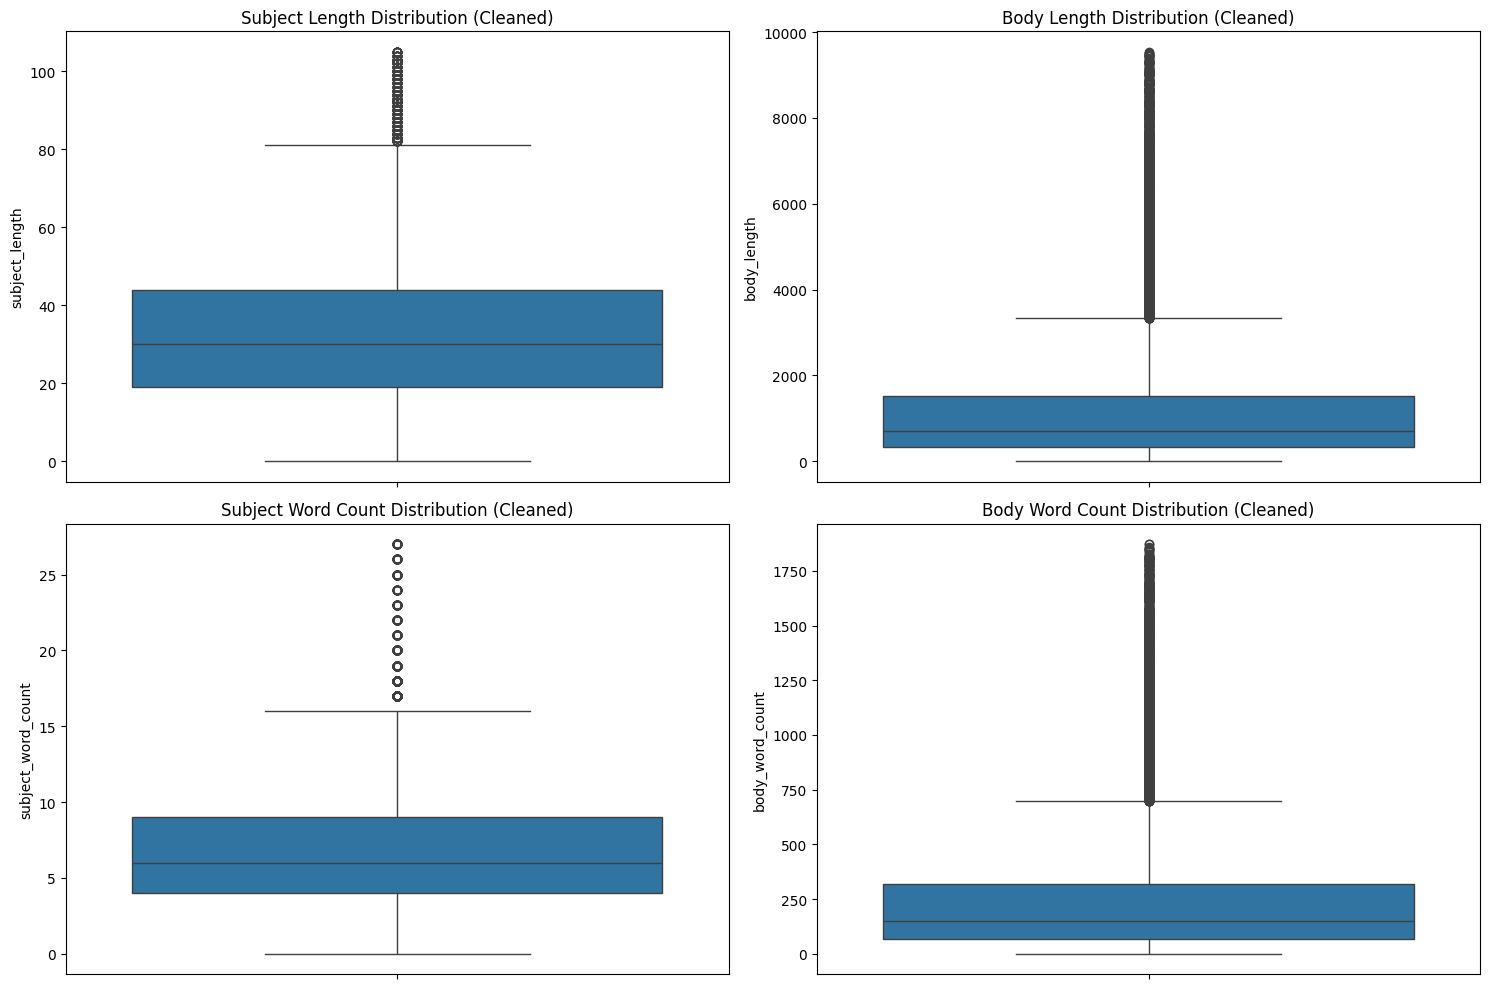


Extracting features from cleaned text...

Feature extraction completed successfully!


In [27]:

# Data cleaning function
def clean_text_data(df):
    """Clean and preprocess the text data"""
    
    # 1. Handle missing values
    df['subject'] = df['subject'].fillna('')  # Fill NaN with empty string
    
    # 2. Convert to string type
    df['subject'] = df['subject'].astype(str)
    df['body'] = df['body'].astype(str)
    
    # 3. Remove special characters that might cause issues
    df['subject'] = df['subject'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
    df['body'] = df['body'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
    
    # 4. Basic text cleaning
    def clean_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    
    df['subject_cleaned'] = df['subject'].apply(clean_text)
    df['body_cleaned'] = df['body'].apply(clean_text)
    
    return df

# Now let's analyze the data quality
def analyze_data_quality(df):
    """Analyze the quality of the dataset"""
    print("1. Dataset Shape:", df.shape)
    
    print("\n2. Missing Values:")
    print(df.isnull().sum())
    
    print("\n3. Data Types:")
    print(df.dtypes)
    
    print("\n4. Empty Strings:")
    print("Empty subjects:", (df['subject'] == '').sum())
    print("Empty bodies:", (df['body'] == '').sum())
    
    print("\n5. Basic Statistics:")
    text_stats = pd.DataFrame({
        'subject_length': df['subject'].str.len(),
        'body_length': df['body'].str.len(),
        'subject_word_count': df['subject'].str.split().str.len(),
        'body_word_count': df['body'].str.split().str.len()
    })
    print(text_stats.describe())
    
    return text_stats


try:
    # Clean the data
    df_cleaned = clean_text_data(df)
    
    # Analyze data quality
    text_stats = analyze_data_quality(df_cleaned)
    
    # Visualize the cleaned data distributions
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Remove extreme outliers for better visualization (e.g., beyond 99th percentile)
    def plot_distribution(data, title, ax):
        percentile_99 = np.percentile(data, 99)
        filtered_data = data[data <= percentile_99]
        sns.boxplot(data=filtered_data, ax=ax)
        ax.set_title(title)
    
    plot_distribution(text_stats['subject_length'], 'Subject Length Distribution (Cleaned)', ax1)
    plot_distribution(text_stats['body_length'], 'Body Length Distribution (Cleaned)', ax2)
    plot_distribution(text_stats['subject_word_count'], 'Subject Word Count Distribution (Cleaned)', ax3)
    plot_distribution(text_stats['body_word_count'], 'Body Word Count Distribution (Cleaned)', ax4)
    
    plt.tight_layout()
    plt.show()
    
    # Now we can safely extract text features
    def extract_text_features(text):
        """Extract various characteristics from text"""
        # Make sure text is string
        text = str(text)
        
        features = {
            # Special characters and symbols
            'special_chars': len(re.findall(r'[^a-zA-Z0-9\s]', text)),
            'numbers': len(re.findall(r'\d', text)),
            'uppercase_words': len(re.findall(r'\b[A-Z]{2,}\b', text)),
            
            # Contact and link information
            'urls': len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)),
            'email_addresses': len(re.findall(r'[\w\.-]+@[\w\.-]+', text)),
            
            # Punctuation marks
            'exclamation_marks': text.count('!'),
            'question_marks': text.count('?'),
            
            # Text structure
            'spaces': text.count(' '),
            
            # Common spam indicators
            'dollar_signs': text.count('$'),
            'percentage_signs': text.count('%')
        }
        return features

    # Extract features from cleaned text
    print("\nExtracting features from cleaned text...")
    subject_features = pd.DataFrame([extract_text_features(text) for text in df_cleaned['subject_cleaned']])
    body_features = pd.DataFrame([extract_text_features(text) for text in df_cleaned['body_cleaned']])
    
    print("\nFeature extraction completed successfully!")
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

Feature Statistics:
       subject_special_chars  subject_numbers  subject_uppercase_words  \
count           29767.000000     29767.000000                  29767.0   
mean                1.579568         1.157759                      0.0   
std                 2.732634         6.664922                      0.0   
min                 0.000000         0.000000                      0.0   
25%                 0.000000         0.000000                      0.0   
50%                 1.000000         0.000000                      0.0   
75%                 2.000000         0.000000                      0.0   
max               194.000000      1067.000000                      0.0   

       subject_urls  subject_email_addresses  subject_exclamation_marks  \
count       29767.0                  29767.0               29767.000000   
mean            0.0                      0.0                   0.093728   
std             0.0                      0.0                   0.539338   
min          

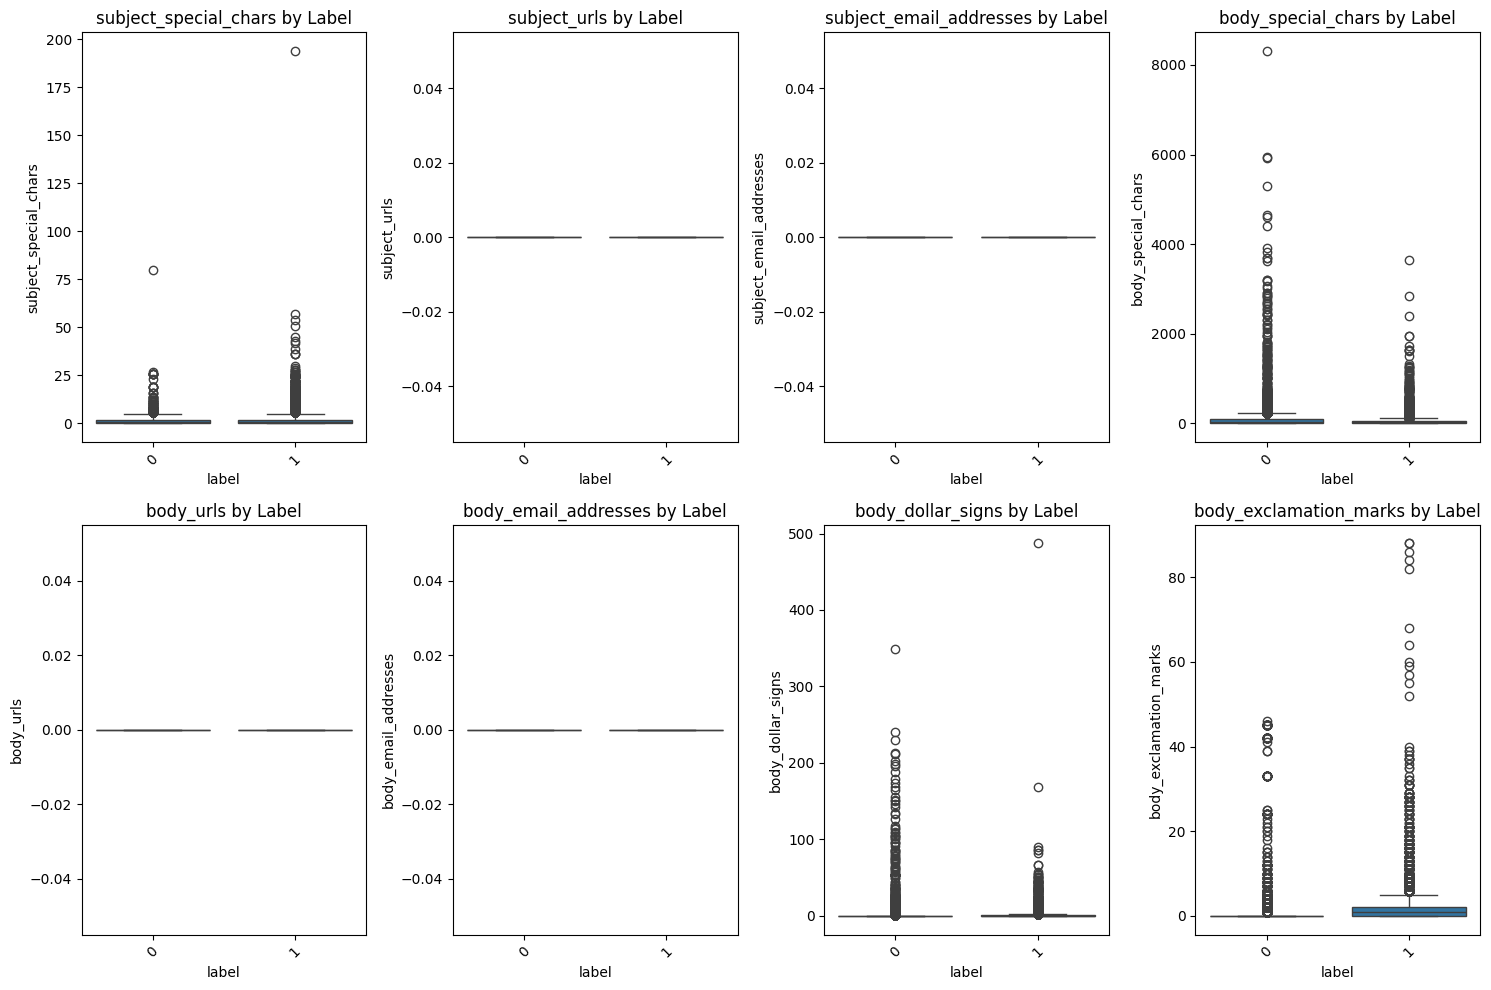


Top 10 Features Correlated with Label:
label                        1.000000
body_exclamation_marks       0.142697
subject_exclamation_marks    0.140169
subject_question_marks       0.126032
subject_percentage_signs     0.116247
subject_dollar_signs         0.092307
subject_special_chars        0.086660
subject_spaces               0.080195
body_percentage_signs        0.053481
body_dollar_signs            0.020583
Name: label, dtype: float64


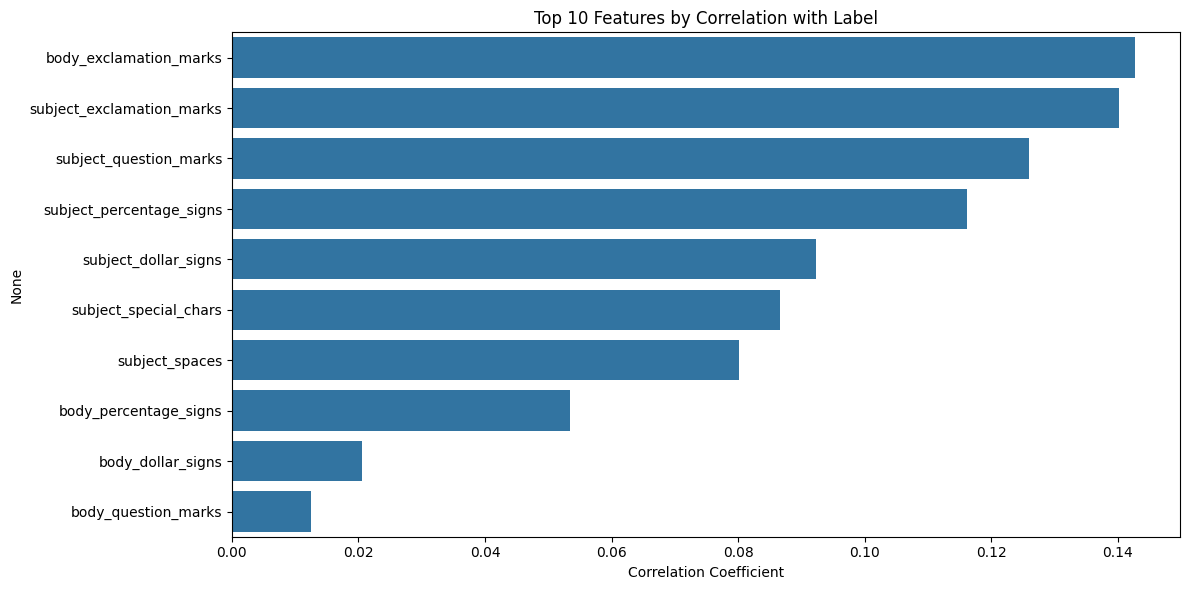

/var/folders/3q/vlkf3y116hb9gjsk53q4gsfh0000gn/T/ipykernel_27999/804497582.py:67: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subject_matches = df_cleaned['subject_cleaned'].str.contains(pattern, case=False, regex=True)
/var/folders/3q/vlkf3y116hb9gjsk53q4gsfh0000gn/T/ipykernel_27999/804497582.py:68: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  body_matches = df_cleaned['body_cleaned'].str.contains(pattern, case=False, regex=True)



Suspicious Pattern Frequencies by Label:
       subject_urgent_words  body_urgent_words  subject_money_terms  \
label                                                                 
0                  0.291305           3.451333             0.240643   
1                  0.994562           4.457642             2.261019   

       body_money_terms  subject_account_terms  body_account_terms  \
label                                                                
0              7.301628               0.221645            5.218162   
1             20.263309               1.130509            8.958214   

       subject_action_words  body_action_words  subject_sensitive_info  \
label                                                                    
0                  2.096131          12.285479                0.056994   
1                  0.393532          26.001717                0.321981   

       body_sensitive_info  
label                       
0                 2.514090  
1       

<Figure size 1200x600 with 0 Axes>

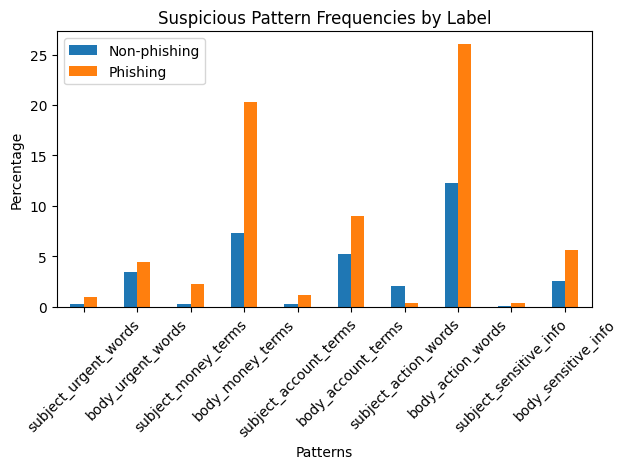

In [28]:
# Combine subject and body features
def analyze_extracted_features(subject_features, body_features, df_cleaned):
    # Add prefixes to distinguish features
    subject_features = subject_features.add_prefix('subject_')
    body_features = body_features.add_prefix('body_')
    
    # Combine features
    all_features = pd.concat([subject_features, body_features], axis=1)
    
    # Add label column for analysis
    all_features['label'] = df_cleaned['label']
    
    # Print basic statistics for each feature
    print("Feature Statistics:")
    print(all_features.describe())
    
    # Analyze feature distributions by label
    plt.figure(figsize=(15, 10))
    
    # Select top features for visualization
    important_features = [
        'subject_special_chars', 'subject_urls', 'subject_email_addresses',
        'body_special_chars', 'body_urls', 'body_email_addresses',
        'body_dollar_signs', 'body_exclamation_marks'
    ]
    
    for idx, feature in enumerate(important_features, 1):
        plt.subplot(2, 4, idx)
        sns.boxplot(x='label', y=feature, data=all_features)
        plt.title(f'{feature} by Label')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation with label
    correlations = all_features.corr()['label'].sort_values(ascending=False)
    print("\nTop 10 Features Correlated with Label:")
    print(correlations[:10])
    
    # Feature importance visualization
    plt.figure(figsize=(12, 6))
    top_features = correlations[1:11]  # Exclude label itself
    sns.barplot(x=top_features.values, y=top_features.index)
    plt.title('Top 10 Features by Correlation with Label')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
    
    return all_features

# Call the analysis function
all_features = analyze_extracted_features(subject_features, body_features, df_cleaned)

# Additional suspicious pattern analysis
def analyze_suspicious_patterns(df_cleaned):
    suspicious_patterns = {
        'urgent_words': r'\b(urgent|immediate|asap)\b',
        'money_terms': r'\b(money|cash|dollar|payment)\b',
        'account_terms': r'\b(account|password|login|verify)\b',
        'action_words': r'\b(click|link|visit|access)\b',
        'sensitive_info': r'\b(ssn|social security|credit card|bank)\b'
    }
    
    pattern_results = {}
    for name, pattern in suspicious_patterns.items():
        subject_matches = df_cleaned['subject_cleaned'].str.contains(pattern, case=False, regex=True)
        body_matches = df_cleaned['body_cleaned'].str.contains(pattern, case=False, regex=True)
        pattern_results[f'subject_{name}'] = subject_matches
        pattern_results[f'body_{name}'] = body_matches
    
    pattern_df = pd.DataFrame(pattern_results)
    
    # Calculate percentage by label
    print("\nSuspicious Pattern Frequencies by Label:")
    pattern_analysis = pattern_df.groupby(df_cleaned['label']).mean() * 100
    print(pattern_analysis)
    
    # Visualize pattern distributions
    plt.figure(figsize=(12, 6))
    pattern_analysis.T.plot(kind='bar')
    plt.title('Suspicious Pattern Frequencies by Label')
    plt.xlabel('Patterns')
    plt.ylabel('Percentage')
    plt.legend(['Non-phishing', 'Phishing'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analyze suspicious patterns
analyze_suspicious_patterns(df_cleaned)

In [29]:
df.columns

Index(['subject', 'body', 'label', 'subject_length', 'body_length',
       'subject_word_count', 'body_word_count', 'subject_body_ratio',
       'subject_cleaned', 'body_cleaned'],
      dtype='object')

In [30]:
df_cleaned.columns

Index(['subject', 'body', 'label', 'subject_length', 'body_length',
       'subject_word_count', 'body_word_count', 'subject_body_ratio',
       'subject_cleaned', 'body_cleaned'],
      dtype='object')

In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/naveenaganesan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naveenaganesan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/naveenaganesan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/naveenaganesan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [85]:
# def preprocess_text_for_analysis(text):
#     """
#     Preprocess text for advanced analysis
#     """
#     # Convert to lowercase
#     text = text.lower()
    
#     # Tokenize
#     tokens = word_tokenize(text)
    
#     # Remove stopwords and non-alphabetic tokens
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
#     # Lemmatize
#     lemmatizer = WordNetLemmatizer()
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
#     return ' '.join(tokens)

# def analyze_word_frequencies(df, column, n_words=20):
#     """
#     Analyze word frequencies and create word cloud
#     """
#     # Combine all text
#     text = ' '.join(df[column])
    
#     # Create word cloud
#     plt.figure(figsize=(12, 6))
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.imshow(wordcloud)
#     plt.axis('off')
#     plt.title(f'Word Cloud - {column}')
#     plt.show()
    
#     # Get word frequencies
#     words = word_tokenize(text)
#     word_freq = Counter(words).most_common(n_words)
    
#     # Plot word frequencies
#     plt.figure(figsize=(12, 6))
#     pd.DataFrame(word_freq, columns=['Word', 'Frequency']).plot(
#         x='Word', y='Frequency', kind='bar'
#     )
#     plt.title(f'Top {n_words} Words - {column}')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
    
#     return word_freq

# def perform_topic_modeling(df, column, n_topics=5, n_words=10):
#     """
#     Perform topic modeling using LDA and NMF
#     """
#     # Create TF-IDF matrix
#     tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
#     text_matrix = tfidf.fit_transform(df[column])
#     feature_names = tfidf.get_feature_names_out()
    
#     # LDA Topic Modeling
#     lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
#     lda_output = lda.fit_transform(text_matrix)
    
#     # NMF Topic Modeling
#     nmf = NMF(n_components=n_topics, random_state=42)
#     nmf_output = nmf.fit_transform(text_matrix)
    
#     # Print top words for each topic
#     print(f"\nLDA Topics for {column}:")
#     for topic_idx, topic in enumerate(lda.components_):
#         top_words = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
#         print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    
#     print(f"\nNMF Topics for {column}:")
#     for topic_idx, topic in enumerate(nmf.components_):
#         top_words = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
#         print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    
#     return lda_output, nmf_output, feature_names

# def create_tfidf_features(df, column, max_features=1000):
#     """
#     Create TF-IDF features and analyze important terms
#     """
#     # Create TF-IDF matrix
#     tfidf = TfidfVectorizer(max_features=max_features, stop_words='english')
#     tfidf_matrix = tfidf.fit_transform(df[column])
#     feature_names = tfidf.get_feature_names_out()
    
#     # Convert to DataFrame
#     tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    
#     # Analyze average TF-IDF scores by label
#     tfidf_by_label = []
#     for label in [0, 1]:
#         mask = df['label'] == label
#         avg_tfidf = tfidf_matrix[mask].mean(axis=0).A1
#         top_terms = sorted(zip(feature_names, avg_tfidf), key=lambda x: x[1], reverse=True)[:20]
#         tfidf_by_label.append(top_terms)
    
#     # Plot top terms for each label
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
#     # Non-phishing emails
#     terms, scores = zip(*tfidf_by_label[0])
#     ax1.barh(range(len(terms)), scores)
#     ax1.set_yticks(range(len(terms)))
#     ax1.set_yticklabels(terms)
#     ax1.set_title('Top TF-IDF Terms - Non-phishing')
    
#     # Phishing emails
#     terms, scores = zip(*tfidf_by_label[1])
#     ax2.barh(range(len(terms)), scores)
#     ax2.set_yticks(range(len(terms)))
#     ax2.set_yticklabels(terms)
#     ax2.set_title('Top TF-IDF Terms - Phishing')
    
#     plt.tight_layout()
#     plt.show()
    
#     return tfidf_matrix, feature_names

# # Main analysis
# def main_text_analysis(df):
#     """
#     Perform complete text analysis
#     """
#     print("Starting text analysis...")
    
#     # Preprocess text
#     print("Preprocessing text...")
#     df['processed_subject'] = df['subject_cleaned'].apply(preprocess_text_for_analysis)
#     df['processed_body'] = df['body_cleaned'].apply(preprocess_text_for_analysis)
    
#     # 1. Word Frequency Analysis
#     print("\nAnalyzing word frequencies...")
#     print("\nSubject Analysis:")
#     subject_freq = analyze_word_frequencies(df, 'processed_subject')
#     print("\nBody Analysis:")
#     body_freq = analyze_word_frequencies(df, 'processed_body')
    
#     # 2. Topic Modeling
#     print("\nPerforming topic modeling...")
#     subject_lda, subject_nmf, subject_features = perform_topic_modeling(df, 'processed_subject')
#     body_lda, body_nmf, body_features = perform_topic_modeling(df, 'processed_body')
    
#     # 3. TF-IDF Analysis
#     print("\nCreating TF-IDF features...")
#     subject_tfidf, subject_terms = create_tfidf_features(df, 'processed_subject')
#     body_tfidf, body_terms = create_tfidf_features(df, 'processed_body')
    
#     return {
#         'word_frequencies': {'subject': subject_freq, 'body': body_freq},
#         'topic_modeling': {
#             'subject': {'lda': subject_lda, 'nmf': subject_nmf, 'features': subject_features},
#             'body': {'lda': body_lda, 'nmf': body_nmf, 'features': body_features}
#         },
#         'tfidf': {'subject': subject_tfidf, 'body': body_tfidf}
#     }

# # Run the analysis
# analysis_results = main_text_analysis(df_cleaned)

In [ ]:
# def preprocess_text_for_analysis(text):
#     """
#     Preprocess text for advanced analysis
#     """
#     try:
#         # Ensure text is string
#         text = str(text)
        
#         # Convert to lowercase
#         text = text.lower()
        
#         # Tokenize
#         tokens = word_tokenize(text)
        
#         # Remove stopwords and non-alphabetic tokens
#         stop_words = set(stopwords.words('english'))
#         tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        
#         # Lemmatize
#         lemmatizer = WordNetLemmatizer()
#         tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
#         return ' '.join(tokens)
#     except Exception as e:
#         print(f"Error in preprocessing text: {str(e)}")
#         return text  # Return original text if preprocessing fails

# def create_tfidf_features(texts, max_features=1000):
#     """
#     Create TF-IDF features
#     """
#     try:
#         # Create TF-IDF matrix
#         tfidf = TfidfVectorizer(max_features=max_features, 
#                                stop_words='english',
#                                ngram_range=(1, 2))  # Include bigrams
#         tfidf_matrix = tfidf.fit_transform(texts)
#         return tfidf_matrix, tfidf.get_feature_names_out()
#     except Exception as e:
#         print(f"Error in TF-IDF creation: {str(e)}")
#         return None, None

# def main_text_analysis(df):
#     """
#     Perform complete text analysis with error handling
#     """
#     try:
#         print("Starting text analysis...")
        
#         # Check if required columns exist
#         required_columns = ['subject_cleaned', 'body_cleaned']
#         if not all(col in df.columns for col in required_columns):
#             raise ValueError("Required columns missing from dataframe")
        
#         # Initialize results dictionary
#         results = {
#             'tfidf': {},
#             'preprocessing': {'success': False},
#             'feature_names': {}
#         }
        
#         # Preprocess text
#         print("Preprocessing text...")
#         df['processed_subject'] = df['subject_cleaned'].apply(preprocess_text_for_analysis)
#         df['processed_body'] = df['body_cleaned'].apply(preprocess_text_for_analysis)
#         results['preprocessing']['success'] = True
        
#         # Create TF-IDF features for subject
#         print("Creating TF-IDF features for subject...")
#         subject_tfidf, subject_terms = create_tfidf_features(df['processed_subject'])
#         if subject_tfidf is not None:
#             results['tfidf']['subject'] = subject_tfidf
#             results['feature_names']['subject'] = subject_terms
        
#         # Create TF-IDF features for body
#         print("Creating TF-IDF features for body...")
#         body_tfidf, body_terms = create_tfidf_features(df['processed_body'])
#         if body_tfidf is not None:
#             results['tfidf']['body'] = body_tfidf
#             results['feature_names']['body'] = body_terms
        
#         print("Text analysis completed successfully!")
#         return results
    
#     except Exception as e:
#         print(f"Error in main text analysis: {str(e)}")
#         return None

# # Function to check if analysis was successful
# def verify_analysis_results(results):
#     """
#     Verify if the analysis results are valid
#     """
#     if results is None:
#         print("Analysis failed completely")
#         return False
    
#     success = True
    
#     if not results['preprocessing']['success']:
#         print("Text preprocessing failed")
#         success = False
    
#     if 'subject' not in results['tfidf'] or results['tfidf']['subject'] is None:
#         print("Subject TF-IDF creation failed")
#         success = False
    
#     if 'body' not in results['tfidf'] or results['tfidf']['body'] is None:
#         print("Body TF-IDF creation failed")
#         success = False
    
#     return success

# # Run the analysis with verification
# try:
#     print("Starting analysis pipeline...")
    
#     # Ensure df_cleaned exists and has required columns
#     if 'df_cleaned' not in globals():
#         raise NameError("df_cleaned not found. Please run the data cleaning steps first.")
    
#     # Run the analysis
#     analysis_results = main_text_analysis(df_cleaned)
    
#     # Verify results
#     if verify_analysis_results(analysis_results):
#         print("Analysis completed successfully!")
        
#         # Print some basic statistics
#         print("\nTF-IDF Matrix Shapes:")
#         print(f"Subject: {analysis_results['tfidf']['subject'].shape}")
#         print(f"Body: {analysis_results['tfidf']['body'].shape}")
        
#         # Print sample feature names
#         print("\nSample Subject Features:")
#         print(analysis_results['feature_names']['subject'][:10])
#         print("\nSample Body Features:")
#         print(analysis_results['feature_names']['body'][:10])
#     else:
#         print("Analysis completed with some errors. Please check the messages above.")
    
# except Exception as e:
#     print(f"Error in analysis pipeline: {str(e)}")
#     print("Please ensure that:")
#     print("1. The data cleaning steps have been run")
#     print("2. The cleaned dataframe (df_cleaned) exists")
#     print("3. The required columns (subject_cleaned, body_cleaned) are present")



Classification models

In [78]:
# # Import required libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
# import warnings
# warnings.filterwarnings('ignore')

# def prepare_features(df, subject_tfidf, body_tfidf):
#     """
#     Prepare features for modeling
#     """
#     # Combine TF-IDF features
#     tfidf_features = np.hstack([subject_tfidf.toarray(), body_tfidf.toarray()])
    
#     # Create other features DataFrame
#     other_features = pd.DataFrame({
#         # Length-based features
#         'subject_length': df['subject_cleaned'].str.len(),
#         'body_length': df['body_cleaned'].str.len(),
#         'subject_word_count': df['subject_cleaned'].str.split().str.len(),
#         'body_word_count': df['body_cleaned'].str.split().str.len(),
        
#         # Special character features
#         'subject_special_chars': df['subject_cleaned'].str.count(r'[^a-zA-Z0-9\s]'),
#         'body_special_chars': df['body_cleaned'].str.count(r'[^a-zA-Z0-9\s]'),
        
#         # URL and email features
#         'subject_urls': df['subject_cleaned'].str.count(r'http[s]?://'),
#         'body_urls': df['body_cleaned'].str.count(r'http[s]?://'),
#         'subject_emails': df['subject_cleaned'].str.count(r'[\w\.-]+@[\w\.-]+'),
#         'body_emails': df['body_cleaned'].str.count(r'[\w\.-]+@[\w\.-]+'),
        
#         # Punctuation features
#         'subject_exclamation': df['subject_cleaned'].str.count('!'),
#         'body_exclamation': df['body_cleaned'].str.count('!'),
#         'subject_question': df['subject_cleaned'].str.count('?'),
#         'body_question': df['body_cleaned'].str.count('?'),
        
#         # Capitalization features
#         'subject_uppercase_ratio': df['subject_cleaned'].str.count(r'[A-Z]') / 
#                                  df['subject_cleaned'].str.len().clip(lower=1),
#         'body_uppercase_ratio': df['body_cleaned'].str.count(r'[A-Z]') / 
#                                df['body_cleaned'].str.len().clip(lower=1)
#     })
    
#     # Combine all features
#     X = np.hstack([tfidf_features, other_features])
#     y = df['label']
    
#     return X, y

# def train_evaluate_models(X, y):
#     """
#     Train and evaluate multiple models
#     """
#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )
    
#     # Scale features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Define models
#     models = {
#         'Logistic Regression': LogisticRegression(random_state=42),
#         'Random Forest': RandomForestClassifier(random_state=42),
#         'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#         'SVM': SVC(probability=True, random_state=42)
#     }
    
#     # Train and evaluate each model
#     results = {}
#     plt.figure(figsize=(12, 8))
    
#     for name, model in models.items():
#         print(f"\nTraining {name}...")
        
#         # Train model
#         model.fit(X_train_scaled, y_train)
        
#         # Make predictions
#         y_pred = model.predict(X_test_scaled)
#         y_prob = model.predict_proba(X_test_scaled)[:, 1]
        
#         # Calculate metrics
#         report = classification_report(y_test, y_pred)
#         conf_matrix = confusion_matrix(y_test, y_pred)
        
#         # ROC curve
#         fpr, tpr, _ = roc_curve(y_test, y_prob)
#         roc_auc = auc(fpr, tpr)
        
#         plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        
#         # Store results
#         results[name] = {
#             'model': model,
#             'report': report,
#             'conf_matrix': conf_matrix,
#             'auc': roc_auc
#         }
        
#         # Print results
#         print(f"\nClassification Report for {name}:")
#         print(report)
        
#         # Plot confusion matrix
#         plt.figure(figsize=(6, 6))
#         sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#         plt.title(f'Confusion Matrix - {name}')
#         plt.ylabel('True Label')
#         plt.xlabel('Predicted Label')
#         plt.show()
    
#     # Plot ROC curves
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curves')
#     plt.legend(loc='lower right')
#     plt.show()
    
#     return results

# def build_deep_learning_model(X, y):
#     """
#     Build and train a deep learning model
#     """
#     # Split data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )
    
#     # Scale features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Build model
#     model = Sequential([
#         Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
#         BatchNormalization(),
#         Dropout(0.3),
        
#         Dense(128, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.2),
        
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.1),
        
#         Dense(1, activation='sigmoid')
#     ])
    
#     # Compile model
#     model.compile(
#         optimizer='adam',
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#     )
    
#     # Train model
#     history = model.fit(
#         X_train_scaled, y_train,
#         validation_split=0.2,
#         epochs=50,
#         batch_size=32,
#         callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
#         verbose=1
#     )
    
#     # Evaluate model
#     y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    
#     # Print results
#     print("\nDeep Learning Model Results:")
#     print(classification_report(y_test, y_pred))
    
#     # Plot training history
#     plt.figure(figsize=(12, 4))
    
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Model Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
    
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Model Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
    
#     plt.tight_layout()
#     plt.show()
    
#     return model, history

# # Main execution
# def main():
#     # Prepare features
#     X, y = prepare_features(df_cleaned, analysis_results['tfidf']['subject'], 
#                           analysis_results['tfidf']['body'])
    
#     # Train and evaluate traditional models
#     print("Training traditional models...")
#     model_results = train_evaluate_models(X, y)
    
#     # Train deep learning model
#     print("\nTraining deep learning model...")
#     dl_model, dl_history = build_deep_learning_model(X, y)
    
#     return model_results, dl_model, dl_history

# # Run the modeling pipeline
# model_results, dl_model, dl_history = main()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
# import re
# import warnings
# warnings.filterwarnings('ignore')

# def prepare_features(df, subject_tfidf, body_tfidf):
#     """
#     Prepare features for modeling with error handling
#     """
#     try:
#         print("Preparing features...")
        
#         # Convert TF-IDF matrices to arrays and combine
#         tfidf_features = np.hstack([
#             subject_tfidf.toarray() if hasattr(subject_tfidf, 'toarray') else subject_tfidf,
#             body_tfidf.toarray() if hasattr(body_tfidf, 'toarray') else body_tfidf
#         ])

#         print("TFIDF Features: ", tfidf_features)
        
#         # Safe string operations
#         def safe_len(x):
#             return len(str(x))
        
#         def safe_word_count(x):
#             return len(str(x).split())
        
#         def safe_pattern_count(text, pattern):
#             try:
#                 return len(re.findall(pattern, str(text)))
#             except:
#                 return 0
        
#         # Create other features DataFrame
#         other_features = pd.DataFrame({
#             # Length-based features
#             'subject_length': df['subject_cleaned'].apply(safe_len),
#             'body_length': df['body_cleaned'].apply(safe_len),
#             'subject_word_count': df['subject_cleaned'].apply(safe_word_count),
#             'body_word_count': df['body_cleaned'].apply(safe_word_count),
            
#             # Special character features
#             'subject_special_chars': df['subject_cleaned'].apply(lambda x: safe_pattern_count(x, r'[^a-zA-Z0-9\s]')),
#             'body_special_chars': df['body_cleaned'].apply(lambda x: safe_pattern_count(x, r'[^a-zA-Z0-9\s]')),
            
#             # URL and email features
#             'subject_urls': df['subject_cleaned'].apply(lambda x: safe_pattern_count(x, r'http[s]?://[^\s]+')),
#             'body_urls': df['body_cleaned'].apply(lambda x: safe_pattern_count(x, r'http[s]?://[^\s]+')),
#             'subject_emails': df['subject_cleaned'].apply(lambda x: safe_pattern_count(x, r'[^\s]+@[^\s]+')),
#             'body_emails': df['body_cleaned'].apply(lambda x: safe_pattern_count(x, r'[^\s]+@[^\s]+')),
            
#             # Punctuation features
#             'subject_exclamation': df['subject_cleaned'].str.count('!').fillna(0),
#             'body_exclamation': df['body_cleaned'].str.count('!').fillna(0),
#             'subject_question': df['subject_cleaned'].str.count('?').fillna(0),
#             'body_question': df['body_cleaned'].str.count('?').fillna(0)
#         })
        
#         print("Adding ratio features...")
#         # Add ratio features safely
#         other_features['subject_uppercase_ratio'] = df['subject_cleaned'].apply(
#             lambda x: len(re.findall(r'[A-Z]', str(x))) / safe_len(x) if safe_len(x) > 0 else 0
#         )
#         other_features['body_uppercase_ratio'] = df['body_cleaned'].apply(
#             lambda x: len(re.findall(r'[A-Z]', str(x))) / safe_len(x) if safe_len(x) > 0 else 0
#         )
        
#         # Fill any NaN values that might have been created
#         other_features = other_features.fillna(0)
        
#         # Combine all features
#         print(f"TF-IDF features shape: {tfidf_features.shape}")
#         print(f"Other features shape: {other_features.shape}")
        
#         X = np.hstack([tfidf_features, other_features])
#         y = df['label']
        
#         print(f"Final feature matrix shape: {X.shape}")
#         return X, y
        
#     except Exception as e:
#         print(f"Error in feature preparation: {str(e)}")
#         raise

# def train_evaluate_models(X, y):
#     """
#     Train and evaluate multiple models
#     """
#     try:
#         # Split the data
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=0.2, random_state=42, stratify=y
#         )
        
#         # Scale features
#         scaler = StandardScaler()
#         X_train_scaled = scaler.fit_transform(X_train)
#         X_test_scaled = scaler.transform(X_test)
        
#         # Define models
#         models = {
#             'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
#             'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
#             'Gradient Boosting': GradientBoostingClassifier(random_state=42)
#         }
        
#         # Train and evaluate each model
#         results = {}
        
#         for name, model in models.items():
#             print(f"\nTraining {name}...")
            
#             # Train model
#             model.fit(X_train_scaled, y_train)
            
#             # Make predictions
#             y_pred = model.predict(X_test_scaled)
#             y_prob = model.predict_proba(X_test_scaled)[:, 1]
            
#             # Calculate metrics
#             results[name] = {
#                 'model': model,
#                 'predictions': y_pred,
#                 'probabilities': y_prob,
#                 'report': classification_report(y_test, y_pred),
#                 'conf_matrix': confusion_matrix(y_test, y_pred)
#             }
            
#             # Print results
#             print(f"\nClassification Report for {name}:")
#             print(results[name]['report'])
            
#             # Plot confusion matrix
#             plt.figure(figsize=(6, 6))
#             sns.heatmap(results[name]['conf_matrix'], 
#                        annot=True, fmt='d', cmap='Blues',
#                        xticklabels=['Non-Phishing', 'Phishing'],
#                        yticklabels=['Non-Phishing', 'Phishing'])
#             plt.title(f'Confusion Matrix - {name}')
#             plt.ylabel('True Label')
#             plt.xlabel('Predicted Label')
#             plt.show()
        
#         return results
        
#     except Exception as e:
#         print(f"Error in model training: {str(e)}")
#         raise

# def main():
#     try:
#         # Prepare features
#         X, y = prepare_features(df_cleaned, analysis_results['tfidf']['subject'], 
#                               analysis_results['tfidf']['body'])
        
#         # Train and evaluate traditional models
#         print("Training traditional models...")
#         model_results = train_evaluate_models(X, y)
        
#         # Return results
#         return model_results
    
#     except Exception as e:
#         print(f"Error in main execution: {str(e)}")
#         return None

# # Run the modeling pipeline with error handling
# try:
#     print("Starting modeling pipeline...")
#     model_results = main()
    
#     if model_results is not None:
#         print("\nModeling completed successfully!")
        
#         # Print best model results
#         best_model = max(model_results.items(), 
#                         key=lambda x: float(re.search(r'accuracy\s*:\s*(0\.\d+)',
#                                                     x[1]['report']).group(1)))
#         print(f"\nBest performing model: {best_model[0]}")
#     else:
#         print("Modeling failed. Please check the errors above.")
        
# except Exception as e:
#     print(f"Pipeline execution failed: {str(e)}")

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def build_deep_learning_model(all_features, test_size=0.2, random_state=42):
    # Prepare the data
    X = all_features.drop('label', axis=1)
    y = all_features['label']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Build the model
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Train the model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    return {
        'model': model,
        'history': history,
        'scaler': scaler,
        'predictions': y_pred_binary,
        'test_accuracy': test_accuracy,
        'test_data': (X_test, y_test)
    }

# Use the model
results = build_deep_learning_model(all_features)

Epoch 1/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.7038 - loss: 0.5970 - val_accuracy: 0.7898 - val_loss: 0.4665
Epoch 2/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.7834 - loss: 0.4868 - val_accuracy: 0.7966 - val_loss: 0.4484
Epoch 3/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.7902 - loss: 0.4712 - val_accuracy: 0.7995 - val_loss: 0.4355
Epoch 4/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7995 - loss: 0.4476 - val_accuracy: 0.8035 - val_loss: 0.4250
Epoch 5/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8000 - loss: 0.4414 - val_accuracy: 0.8081 - val_loss: 0.4192
Epoch 6/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8052 - loss: 0.4300 - val_accuracy: 0.8104 - val_loss: 0.4144
Epoch 7/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8119 - loss: 0.4233 - val_accuracy: 0.8150 - val_loss: 0.4118
Epoch 8/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8105 - loss: 0.4248 - 

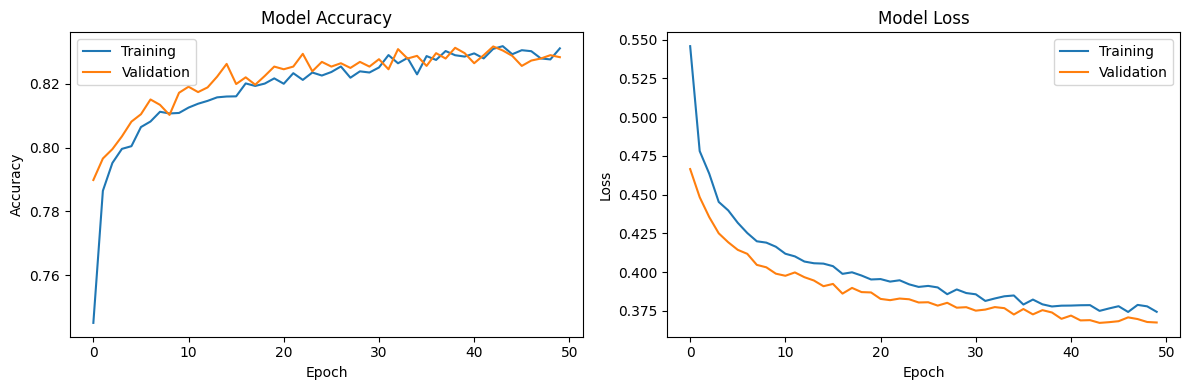


Logistic Regression Results:
Accuracy: 0.7417

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3185
           1       0.78      0.63      0.69      2769

    accuracy                           0.74      5954
   macro avg       0.75      0.73      0.73      5954
weighted avg       0.75      0.74      0.74      5954


Random Forest Results:
Accuracy: 0.8562

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3185
           1       0.85      0.84      0.84      2769

    accuracy                           0.86      5954
   macro avg       0.86      0.86      0.86      5954
weighted avg       0.86      0.86      0.86      5954


SVM Results:
Accuracy: 0.7870

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      3185
           1       0.83      0.68      0.75   

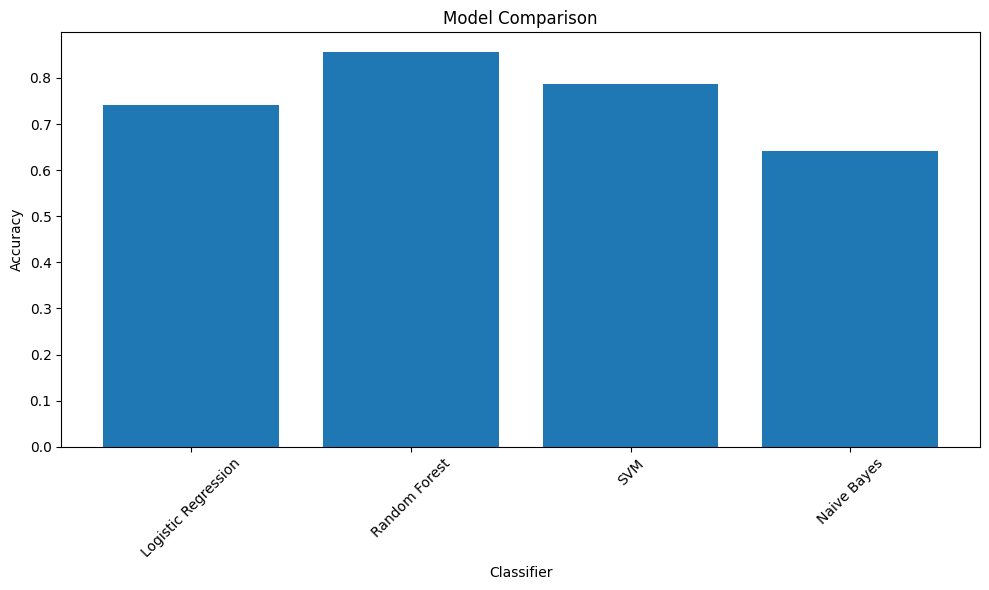

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Plot deep learning history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def train_multiple_classifiers(X, y):
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42),
        'Naive Bayes': GaussianNB()
    }
    
    results = {}
    
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values())
    plt.title('Model Comparison')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return classifiers, results

# Run evaluation
X = all_features.drop('label', axis=1)
y = all_features['label']

# Plot deep learning results
plot_training_history(results['history'])

# Train and evaluate other classifiers
classifiers, accuracy_results = train_multiple_classifiers(X, y)


Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.7417
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3185
           1       0.78      0.63      0.69      2769

    accuracy                           0.74      5954
   macro avg       0.75      0.73      0.73      5954
weighted avg       0.75      0.74      0.74      5954



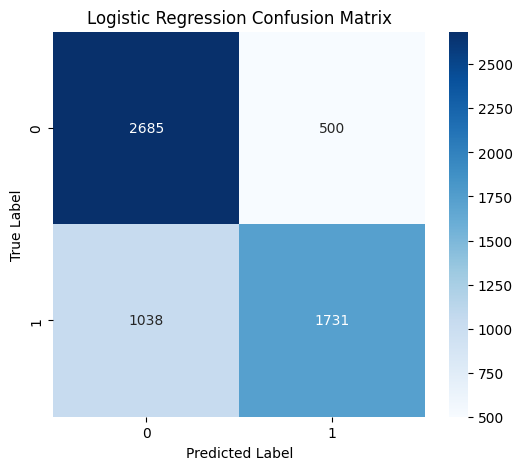


Training Random Forest...
Random Forest Results:
Accuracy: 0.8562
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3185
           1       0.85      0.84      0.84      2769

    accuracy                           0.86      5954
   macro avg       0.86      0.86      0.86      5954
weighted avg       0.86      0.86      0.86      5954



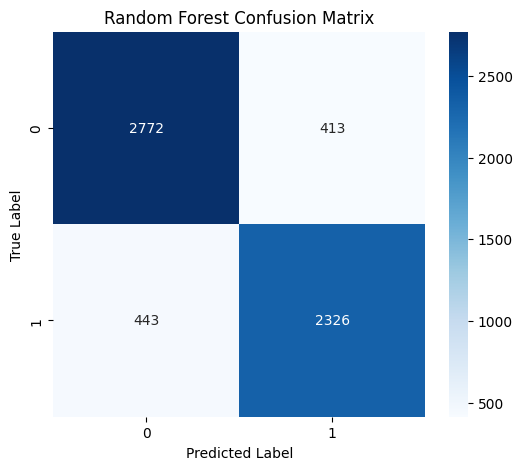


Training SVM...
SVM Results:
Accuracy: 0.7870
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      3185
           1       0.83      0.68      0.75      2769

    accuracy                           0.79      5954
   macro avg       0.80      0.78      0.78      5954
weighted avg       0.79      0.79      0.78      5954



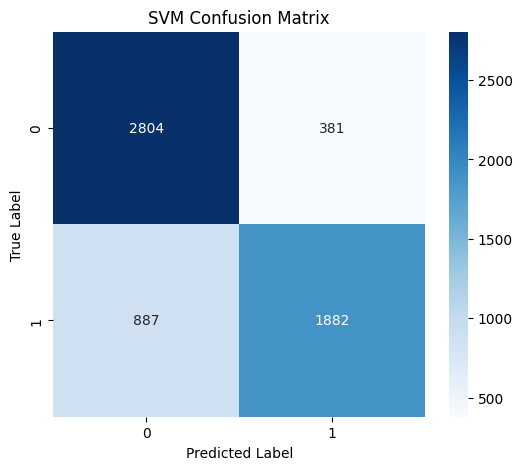


Training Naive Bayes...
Naive Bayes Results:
Accuracy: 0.6411
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      3185
           1       0.86      0.27      0.42      2769

    accuracy                           0.64      5954
   macro avg       0.73      0.62      0.58      5954
weighted avg       0.72      0.64      0.59      5954



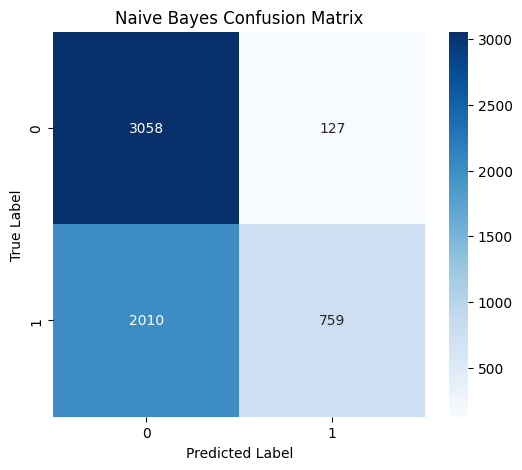


Training Deep Learning...
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step
Deep Learning Results:
Accuracy: 0.8223
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      3185
           1       0.82      0.79      0.80      2769

    accuracy                           0.82      5954
   macro avg       0.82      0.82      0.82      5954
weighted avg       0.82      0.82      0.82      5954



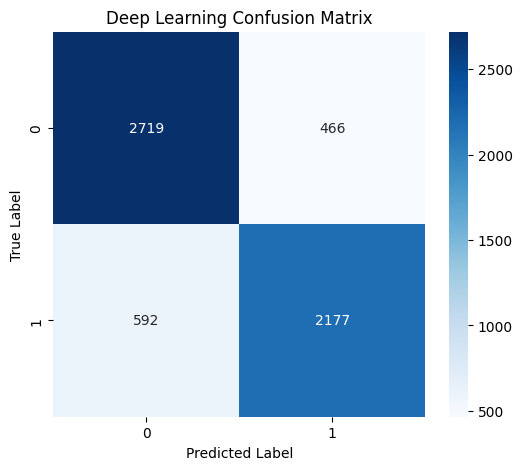

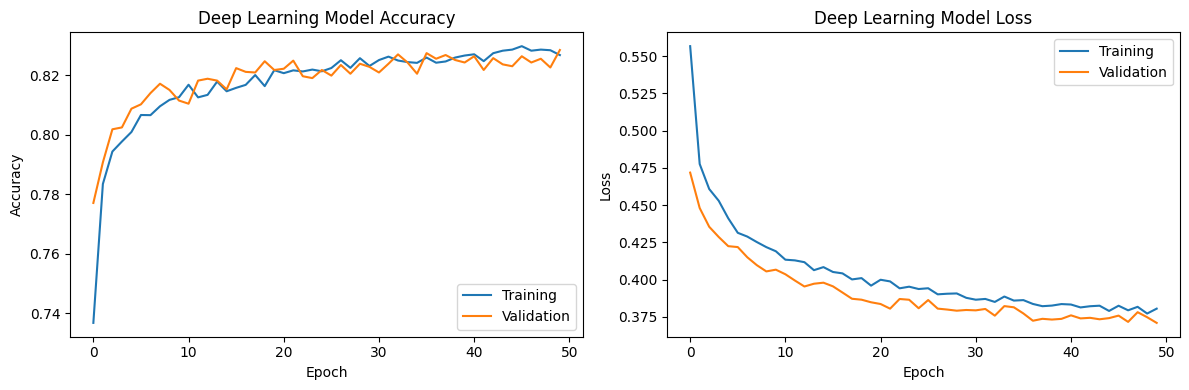

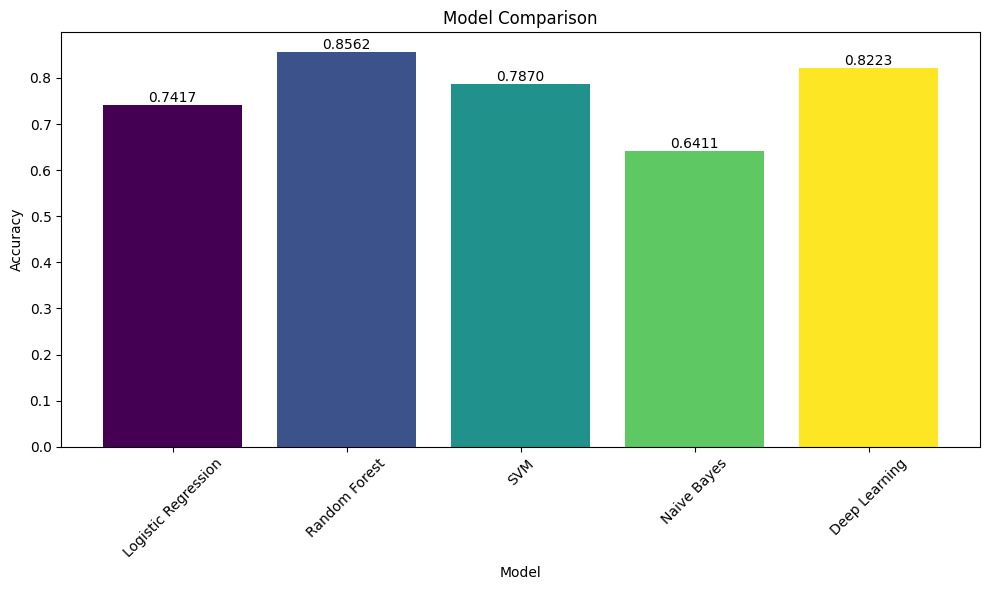

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns

def build_and_train_models(X, y, test_size=0.2, random_state=42):
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),
        'SVM': SVC(kernel='rbf', random_state=random_state),
        'Naive Bayes': GaussianNB(),
        'Deep Learning': build_deep_learning_model(X_train.shape[1])
    }
    
    results = {}
    histories = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        if name == 'Deep Learning':
            history = model.fit(
                X_train_scaled, y_train,
                epochs=50,
                batch_size=32,
                validation_split=0.2,
                verbose=0
            )
            histories[name] = history
            y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
        else:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        
        # Calculate accuracy and store results
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {
            'accuracy': accuracy,
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred)
        }
        
        print(f"{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(results[name]['classification_report'])
        
        # Plot confusion matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    
    # Plot deep learning training history
    if 'Deep Learning' in histories:
        plot_dl_history(histories['Deep Learning'])
    
    # Compare all models
    plot_model_comparison(results)
    
    return models, results, histories

def build_deep_learning_model(input_shape):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def plot_dl_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Deep Learning Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Deep Learning Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_model_comparison(results):
    accuracies = {name: res['accuracy'] for name, res in results.items()}
    
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(accuracies)))
    bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
    
    plt.title('Model Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    
    # Add accuracy values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Run all models
X = all_features.drop('label', axis=1)
y = all_features['label']
models, results, histories = build_and_train_models(X, y)

Final Project Work

Pattern Mining Techniques

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
from datetime import datetime
import re

class EmailPatternMiner:
    def __init__(self, df):
        """
        Initialize the pattern miner with a DataFrame containing emails
        DataFrame should have columns: 'subject', 'body', 'label' (1 for phishing, 0 for non-phishing)
        """
        self.df = df
        self.frequent_patterns = None
        self.association_rules = None
        self.sequence_patterns = None
        
    def preprocess_text(self, text):
        """Preprocess text for pattern mining"""
        # Convert to lowercase
        text = str(text).lower()
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Split into words and remove short words
        words = [word for word in text.split() if len(word) > 2]
        return words
    
    def create_transaction_matrix(self):
        """Create a binary transaction matrix for pattern mining"""
        # Combine subject and body
        transactions = []
        for _, row in self.df.iterrows():
            text = f"{row['subject']} {row['body']}"
            words = self.preprocess_text(text)
            transactions.append(words)
            
        # Get unique words
        all_words = list(set().union(*transactions))
        
        # Create binary matrix
        matrix = pd.DataFrame([[1 if word in trans else 0 for word in all_words] 
                             for trans in transactions],
                            columns=all_words)
        return matrix
        
    def mine_frequent_patterns(self, min_support=0.05, min_confidence=0.7):
        """Extract frequent patterns and association rules"""
        # Create transaction matrix
        transaction_matrix = self.create_transaction_matrix()
        
        # Find frequent patterns
        self.frequent_patterns = apriori(transaction_matrix, 
                                       min_support=min_support, 
                                       use_colnames=True)
        
        # Generate rules
        if not self.frequent_patterns.empty:
            self.association_rules = association_rules(
                self.frequent_patterns, 
                metric="confidence",
                min_threshold=min_confidence
            )
            
        return self.frequent_patterns, self.association_rules
    
    def mine_sequential_patterns(self, window_size=3):
        """Mine sequential patterns in email sequences"""
        sequences = []
        labels = []
        
        # Create sequences using sliding window
        for i in range(len(self.df) - window_size + 1):
            window = self.df.iloc[i:i+window_size]
            
            # Extract features from sequence
            sequence = {
                'text_length_pattern': window['body'].str.len().tolist(),
                'special_chars_pattern': [
                    len(re.findall(r'[^a-zA-Z0-9\s]', str(text)))
                    for text in window['body']
                ],
                'word_count_pattern': [
                    len(str(text).split())
                    for text in window['body']
                ],
                'phishing_sequence': window['label'].tolist()
            }
            
            sequences.append(sequence)
            # Label is 1 if next email is phishing
            if i + window_size < len(self.df):
                labels.append(self.df.iloc[i + window_size]['label'])
        
        self.sequence_patterns = pd.DataFrame(sequences)
        return self.sequence_patterns, labels
    
    def visualize_frequent_patterns(self, top_n=20):
        """Visualize frequent patterns analysis results"""
        if self.frequent_patterns is None or self.association_rules is None:
            print("Please run mine_frequent_patterns first!")
            return
            
        # Create figure with subplots
        fig = plt.figure(figsize=(15, 10))
        
        # 1. Top frequent itemsets by support
        plt.subplot(2, 2, 1)
        top_patterns = self.frequent_patterns.nlargest(top_n, 'support')
        sns.barplot(data=top_patterns, x=top_patterns.index, y='support')
        plt.title('Top Frequent Patterns by Support')
        plt.xticks(rotation=45)
        
        # 2. Distribution of rule confidence
        plt.subplot(2, 2, 2)
        sns.histplot(data=self.association_rules, x='confidence', bins=20)
        plt.title('Distribution of Rule Confidence')
        
        # 3. Scatter plot of rule metrics
        plt.subplot(2, 2, 3)
        plt.scatter(self.association_rules['support'], 
                   self.association_rules['confidence'],
                   alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Confidence')
        plt.title('Support vs Confidence for Rules')
        
        # 4. Top rules by lift
        plt.subplot(2, 2, 4)
        top_rules = self.association_rules.nlargest(10, 'lift')
        sns.barplot(data=top_rules, x=top_rules.index, y='lift')
        plt.title('Top 10 Rules by Lift')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
    def visualize_sequential_patterns(self):
        """Visualize sequential pattern analysis results"""
        if self.sequence_patterns is None:
            print("Please run mine_sequential_patterns first!")
            return
            
        fig = plt.figure(figsize=(15, 10))
        
        # 1. Distribution of sequence lengths
        plt.subplot(2, 2, 1)
        seq_lengths = self.sequence_patterns['text_length_pattern'].apply(
            lambda x: np.mean(x))
        sns.histplot(data=seq_lengths, bins=30)
        plt.title('Distribution of Average Sequence Lengths')
        
        # 2. Common phishing sequences
        plt.subplot(2, 2, 2)
        phishing_sequences = self.sequence_patterns['phishing_sequence'].value_counts()
        plt.bar(range(len(phishing_sequences)), phishing_sequences.values)
        plt.title('Common Phishing Sequences')
        plt.xlabel('Sequence Pattern')
        plt.ylabel('Frequency')
        
        # 3. Pattern progression over sequences
        plt.subplot(2, 2, 3)
        avg_lengths = np.array([seq for seq in 
                              self.sequence_patterns['text_length_pattern']])
        mean_progression = avg_lengths.mean(axis=0)
        plt.plot(range(len(mean_progression)), mean_progression, marker='o')
        plt.title('Average Pattern Progression')
        plt.xlabel('Position in Sequence')
        plt.ylabel('Average Length')
        
        # 4. Special characters pattern
        plt.subplot(2, 2, 4)
        avg_special = np.array([seq for seq in 
                              self.sequence_patterns['special_chars_pattern']])
        mean_special = avg_special.mean(axis=0)
        plt.plot(range(len(mean_special)), mean_special, marker='o', color='r')
        plt.title('Special Characters Pattern')
        plt.xlabel('Position in Sequence')
        plt.ylabel('Average Special Characters')
        
        plt.tight_layout()
        plt.show()

def analyze_email_patterns(df):
    """Main function to analyze and visualize email patterns"""
    # Initialize pattern miner
    miner = EmailPatternMiner(df)
    
    # 1. Mine frequent patterns
    print("Mining frequent patterns...")
    frequent_patterns, rules = miner.mine_frequent_patterns(
        min_support=0.05,
        min_confidence=0.7
    )
    print(f"Found {len(frequent_patterns)} frequent patterns")
    print(f"Generated {len(rules)} association rules")
    
    # 2. Visualize frequent patterns
    print("\nVisualizing frequent patterns...")
    miner.visualize_frequent_patterns()
    
    # 3. Mine sequential patterns
    print("\nMining sequential patterns...")
    sequences, labels = miner.mine_sequential_patterns(window_size=3)
    print(f"Generated {len(sequences)} sequence patterns")
    
    # 4. Visualize sequential patterns
    print("\nVisualizing sequential patterns...")
    miner.visualize_sequential_patterns()
    
    return {
        'frequent_patterns': frequent_patterns,
        'association_rules': rules,
        'sequence_patterns': sequences,
        'sequence_labels': labels
    }

if __name__ == "__main__":
    results = analyze_email_patterns(df)
    
    # Print some interesting patterns
    print("\nTop 5 frequent patterns by support:")
    print(results['frequent_patterns'].nlargest(5, 'support'))
    
    print("\nTop 5 association rules by lift:")
    print(results['association_rules'].nlargest(5, 'lift'))

Mining frequent patterns...


KeyboardInterrupt: 

Extracting features...

Extracted features:
   subject_length  body_length  subject_word_count  body_word_count  \
0              25           58                   7               15   
1              32         1608                   9              426   
2              42          171                  10               37   
3              25           58                   7               15   
4              25           58                   7               15   

   subject_capitals  body_capitals  subject_digits  body_digits  \
0                 0              0               6            6   
1                 0              0               2          133   
2                 0              0               6           22   
3                 0              0               6            6   
4                 0              0               5            6   

   subject_special_chars  body_special_chars  has_url  has_email  has_dollar  \
0                      1                   6  

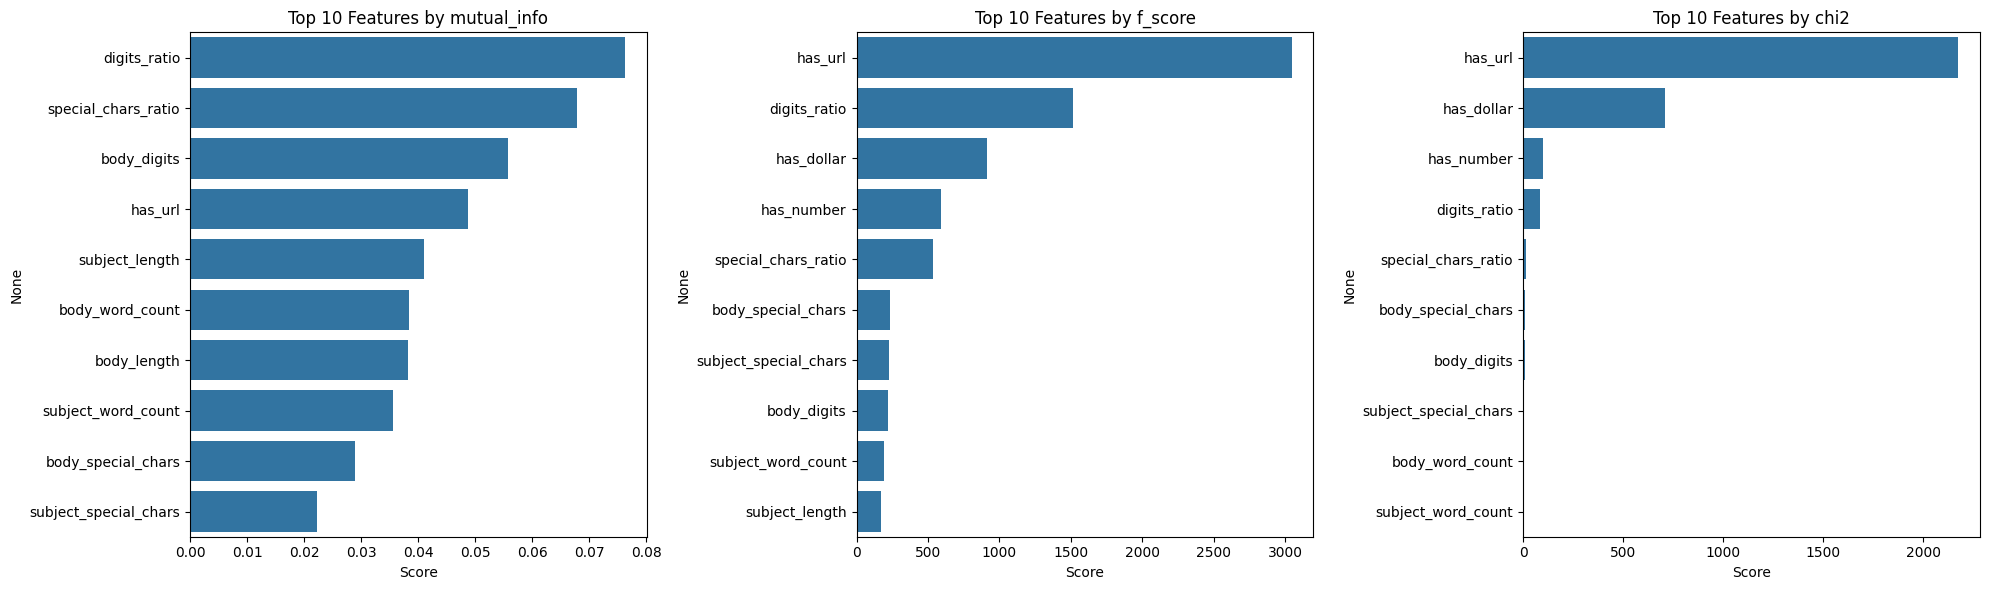


Selecting best features using different methods:

Top 10 features selected by mutual_info:
['subject_length', 'body_length', 'subject_word_count', 'body_word_count', 'subject_digits', 'body_digits', 'body_special_chars', 'has_url', 'digits_ratio', 'special_chars_ratio']

Top 10 features selected by f_score:
['subject_length', 'subject_word_count', 'body_digits', 'subject_special_chars', 'body_special_chars', 'has_url', 'has_dollar', 'has_number', 'digits_ratio', 'special_chars_ratio']

Top 10 features selected by chi2:
['subject_word_count', 'body_word_count', 'body_digits', 'subject_special_chars', 'body_special_chars', 'has_url', 'has_dollar', 'has_number', 'digits_ratio', 'special_chars_ratio']


In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

class EmailFeatureExtractorAndSelector:
    def __init__(self, df):
        """
        Initialize with DataFrame containing 'subject', 'body', and 'label' columns
        """
        self.df = df
        self.features_df = None
        self.X = None
        self.y = self.df['label']
        
    def extract_basic_features(self):
        """Extract basic numerical features from emails"""
        features = pd.DataFrame()
        
        # Length-based features
        features['subject_length'] = self.df['subject'].str.len()
        features['body_length'] = self.df['body'].str.len()
        features['subject_word_count'] = self.df['subject'].str.split().str.len()
        features['body_word_count'] = self.df['body'].str.split().str.len()
        
        # Character-based features
        features['subject_capitals'] = self.df['subject'].str.count(r'[A-Z]')
        features['body_capitals'] = self.df['body'].str.count(r'[A-Z]')
        features['subject_digits'] = self.df['subject'].str.count(r'\d')
        features['body_digits'] = self.df['body'].str.count(r'\d')
        
        # Special character features
        features['subject_special_chars'] = self.df['subject'].str.count(r'[^a-zA-Z0-9\s]')
        features['body_special_chars'] = self.df['body'].str.count(r'[^a-zA-Z0-9\s]')
        
        # Email-specific features
        features['has_url'] = self.df['body'].str.contains('http|www').astype(int)
        features['has_email'] = self.df['body'].str.contains(r'\S+@\S+').astype(int)
        features['has_dollar'] = self.df['body'].str.contains(r'\$').astype(int)
        features['has_number'] = self.df['body'].str.contains(r'\d').astype(int)
        
        # Ratio features
        features['capitals_ratio'] = features['body_capitals'] / features['body_length']
        features['digits_ratio'] = features['body_digits'] / features['body_length']
        features['special_chars_ratio'] = features['body_special_chars'] / features['body_length']
        
        # Fill NaN values
        features = features.fillna(0)
        
        self.features_df = features
        self.X = features
        return features
    
    def select_features(self, method='all', k=10):
        """
        Select top features using different statistical methods
        method: 'mutual_info', 'f_score', 'chi2', or 'all'
        k: number of top features to select
        """
        if self.X is None:
            self.extract_basic_features()
            
        # Scale features to [0,1] for chi2
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(self.X)
        X_scaled = pd.DataFrame(X_scaled, columns=self.X.columns)
        
        results = {}
        
        if method in ['mutual_info', 'all']:
            mi_scores = mutual_info_classif(X_scaled, self.y)
            results['mutual_info'] = dict(zip(self.X.columns, mi_scores))
            
        if method in ['f_score', 'all']:
            f_scores, _ = f_classif(X_scaled, self.y)
            results['f_score'] = dict(zip(self.X.columns, f_scores))
            
        if method in ['chi2', 'all']:
            chi_scores, _ = chi2(X_scaled, self.y)
            results['chi2'] = dict(zip(self.X.columns, chi_scores))
            
        return results
    
    def plot_feature_importance(self, method='all', top_n=10):
        """Plot feature importance scores"""
        scores = self.select_features(method=method)
        
        if method == 'all':
            fig, axes = plt.subplots(1, 3, figsize=(20, 6))
            
            for i, (method_name, method_scores) in enumerate(scores.items()):
                sorted_scores = pd.Series(method_scores).sort_values(ascending=False)
                top_features = sorted_scores.head(top_n)
                
                sns.barplot(x=top_features.values, y=top_features.index, ax=axes[i])
                axes[i].set_title(f'Top {top_n} Features by {method_name}')
                axes[i].set_xlabel('Score')
                
            plt.tight_layout()
            plt.show()
        else:
            sorted_scores = pd.Series(scores[method]).sort_values(ascending=False)
            top_features = sorted_scores.head(top_n)
            
            plt.figure(figsize=(10, 6))
            sns.barplot(x=top_features.values, y=top_features.index)
            plt.title(f'Top {top_n} Features by {method}')
            plt.xlabel('Score')
            plt.tight_layout()
            plt.show()
            
    def get_best_features(self, method='mutual_info', k=10):
        """Get the k best features using specified method"""
        if self.X is None:
            self.extract_basic_features()
            
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(self.X)
        
        if method == 'mutual_info':
            selector = SelectKBest(score_func=mutual_info_classif, k=k)
        elif method == 'f_score':
            selector = SelectKBest(score_func=f_classif, k=k)
        elif method == 'chi2':
            selector = SelectKBest(score_func=chi2, k=k)
        else:
            raise ValueError("Method must be one of 'mutual_info', 'f_score', or 'chi2'")
            
        selector.fit(X_scaled, self.y)
        selected_features = self.X.columns[selector.get_support()].tolist()
        
        return selected_features

def analyze_email_features(df):
    """Main function to analyze and select features"""
    # Initialize extractor
    extractor = EmailFeatureExtractorAndSelector(df)
    
    # Extract features
    print("Extracting features...")
    features = extractor.extract_basic_features()
    print("\nExtracted features:")
    print(features.head())
    
    # Compare different feature selection methods
    print("\nComparing feature selection methods...")
    scores = extractor.select_features(method='all')
    
    # Plot feature importance
    print("\nPlotting feature importance...")
    extractor.plot_feature_importance(method='all', top_n=10)
    
    # Get best features using different methods
    print("\nSelecting best features using different methods:")
    for method in ['mutual_info', 'f_score', 'chi2']:
        best_features = extractor.get_best_features(method=method, k=10)
        print(f"\nTop 10 features selected by {method}:")
        print(best_features)
        
    return {
        'features': features,
        'importance_scores': scores
    }

# Example usage with your DataFrame:
results = analyze_email_features(df)

Using top 10 features from Mutual Info

Training and evaluating models...

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      3185
           1       0.75      0.66      0.70      2769

    accuracy                           0.74      5954
   macro avg       0.74      0.73      0.73      5954
weighted avg       0.74      0.74      0.73      5954


Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3185
           1       0.83      0.82      0.83      2769

    accuracy                           0.84      5954
   macro avg       0.84      0.84      0.84      5954
weighted avg       0.84      0.84      0.84      5954


Training SVM...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      3185
           1       

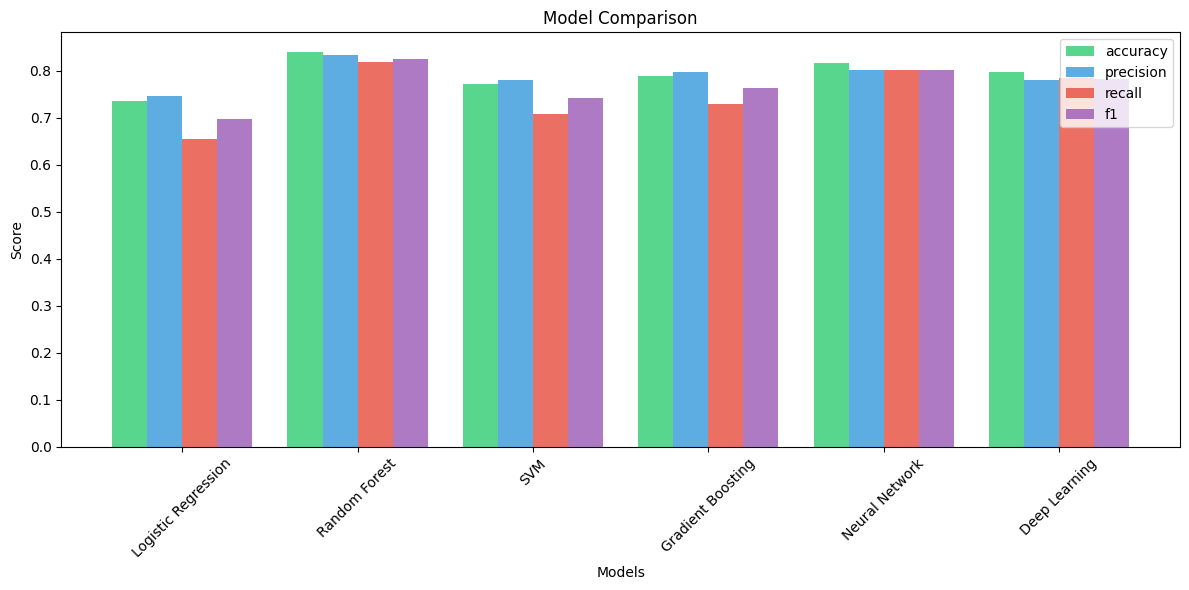

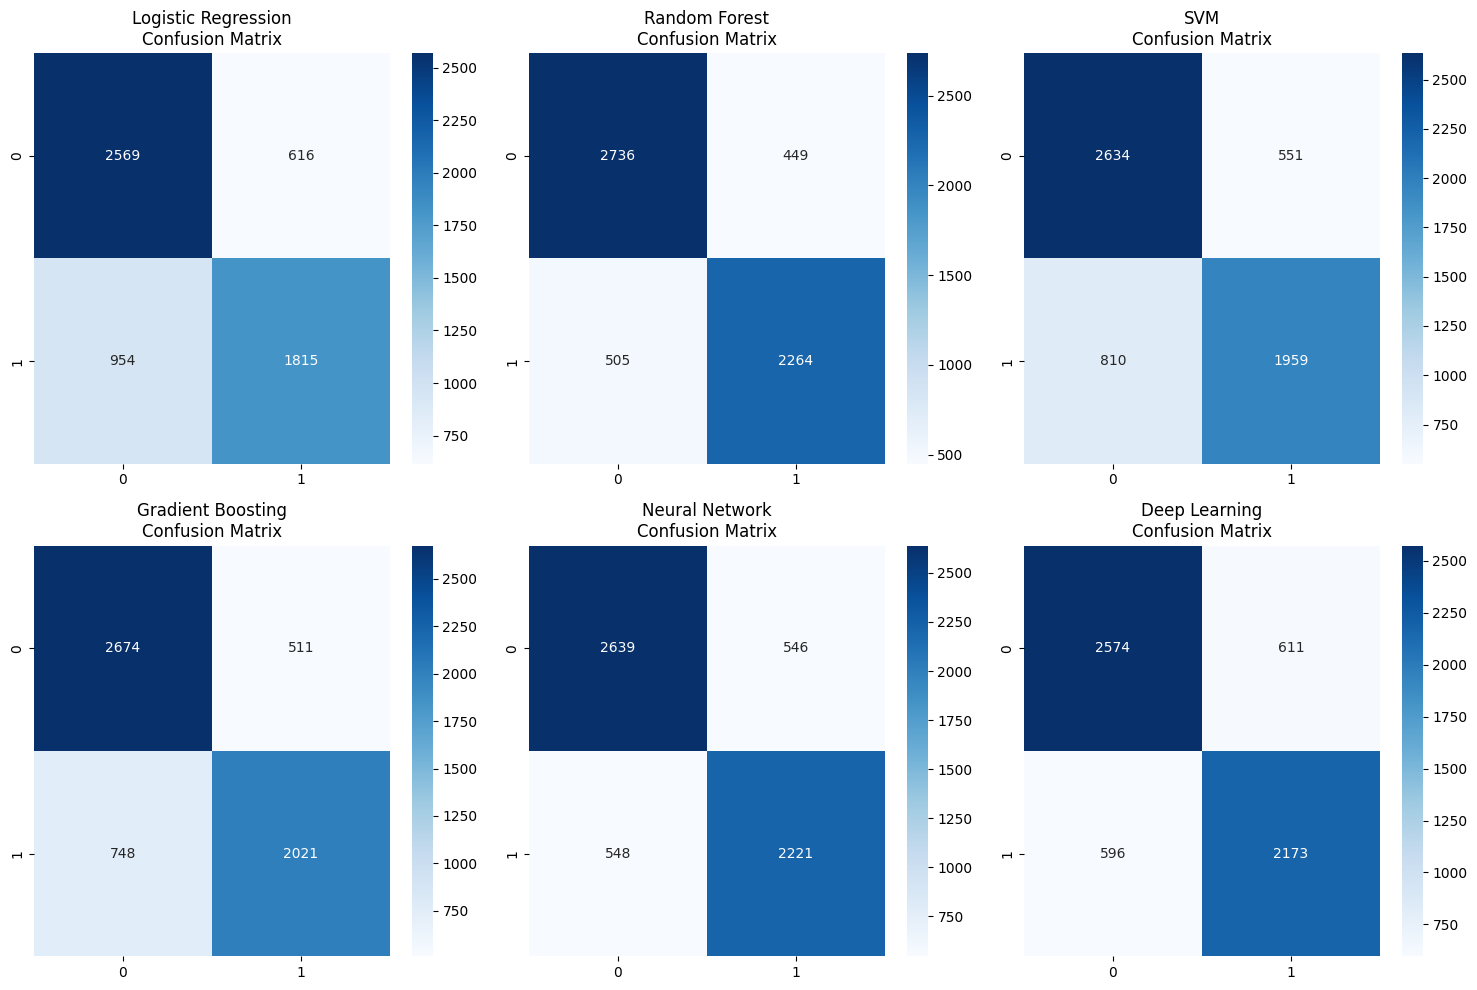

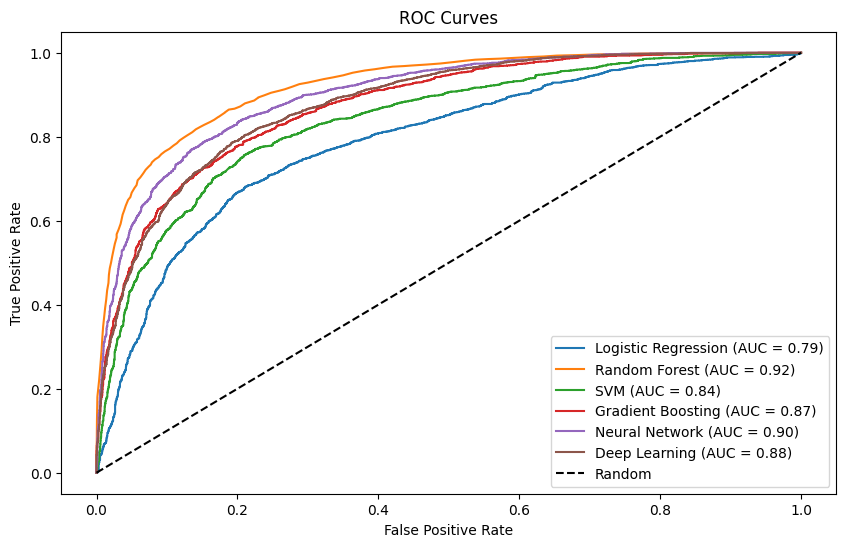

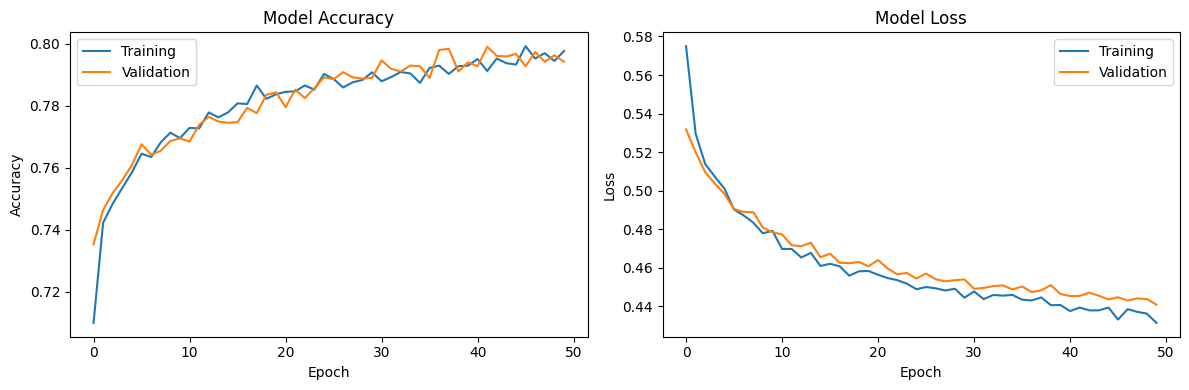


Model Performance Summary:

                      Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.7363     0.7466  0.6555    0.6981
Random Forest          0.8398     0.8345  0.8176    0.8260
SVM                    0.7714     0.7805  0.7075    0.7422
Gradient Boosting      0.7885     0.7982  0.7299    0.7625
Neural Network         0.8163     0.8027  0.8021    0.8024
Deep Learning          0.7973     0.7805  0.7848    0.7826


In [41]:
class EmailClassifier:
    def __init__(self, df, features_to_use):
        self.df = df
        self.features = features_to_use
        self.X = None
        self.y = df['label']
        self.models = {}
        self.results = {}
        # Store test data as class attributes
        self.X_test = None
        self.y_test = None
        
    def prepare_data(self):
        """Extract selected features and prepare data"""
        # First, extract features
        feature_extractor = EmailFeatureExtractorAndSelector(self.df)
        all_features = feature_extractor.extract_basic_features()
        
        # Select only the specified features
        self.X = all_features[self.features]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
        
        # Store test data as class attributes
        self.X_test = X_test
        self.y_test = y_test
        
        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def build_models(self):
        """Initialize all classification models"""
        self.models = {
            'Logistic Regression': LogisticRegression(random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'SVM': SVC(kernel='rbf', probability=True, random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42),
            'Neural Network': MLPClassifier(
                hidden_layer_sizes=(64, 32), 
                max_iter=1000, 
                random_state=42
            )
        }
    
    def build_deep_learning_model(self, input_shape):
        """Build a deep learning model using Tensorflow/Keras"""
        model = models.Sequential([
            layers.Dense(64, activation='relu', input_shape=(input_shape,)),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(16, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        return model
    
    def train_and_evaluate(self):
        """Train and evaluate all models"""
        # Prepare data
        X_train, X_test, y_train, y_test = self.prepare_data()
        
        # Build models
        self.build_models()
        
        # Train and evaluate each model
        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            
            # Train the model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            
            # Calculate metrics
            self.results[name] = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred),
                'recall': recall_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'confusion_matrix': confusion_matrix(y_test, y_pred),
                'y_pred_proba': y_pred_proba,
                'classification_report': classification_report(y_test, y_pred)
            }
            
            print(f"{name} Classification Report:")
            print(self.results[name]['classification_report'])
        
        # Train deep learning model
        print("\nTraining Deep Learning model...")
        dl_model = self.build_deep_learning_model(X_train.shape[1])
        
        # Add early stopping
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
        
        history = dl_model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Evaluate deep learning model
        y_pred = (dl_model.predict(X_test) > 0.5).astype(int)
        y_pred_proba = dl_model.predict(X_test)
        
        self.results['Deep Learning'] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'y_pred_proba': y_pred_proba,
            'history': history.history,
            'classification_report': classification_report(y_test, y_pred)
        }
        
        print("\nDeep Learning Classification Report:")
        print(self.results['Deep Learning']['classification_report'])
        
        return self.results
    
    def plot_results(self):
        """Visualize the results"""
        if self.y_test is None:
            print("Please run train_and_evaluate first!")
            return
            
        # 1. Model Comparison Plot
        plt.figure(figsize=(12, 6))
        metrics = ['accuracy', 'precision', 'recall', 'f1']
        x = np.arange(len(self.results))
        width = 0.2

        colors = {
            'accuracy': '#2ecc71',    
            'precision': '#3498db', 
            'recall': '#e74c3c',    
            'f1': '#9b59b6'          
        }
        
        for i, metric in enumerate(metrics):
            values = [results[metric] for results in self.results.values()]
            plt.bar(x + i*width, values, width, label=metric, color=colors[metric], alpha=0.8)
            
        plt.xlabel('Models')
        plt.ylabel('Score')
        plt.title('Model Comparison')
        plt.xticks(x + width*1.5, self.results.keys(), rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # 2. Confusion Matrices
        n_models = len(self.results)
        n_cols = 3
        n_rows = (n_models + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.ravel()
        
        for idx, (name, results) in enumerate(self.results.items()):
            sns.heatmap(
                results['confusion_matrix'], 
                annot=True, 
                fmt='d', 
                ax=axes[idx],
                cmap='Blues'
            )
            axes[idx].set_title(f'{name}\nConfusion Matrix')
            
        # Hide empty subplots
        for idx in range(len(self.results), len(axes)):
            fig.delaxes(axes[idx])
            
        plt.tight_layout()
        plt.show()
        
        # 3. ROC Curves
        plt.figure(figsize=(10, 6))
        for name, results in self.results.items():
            if 'y_pred_proba' in results:
                fpr, tpr, _ = roc_curve(self.y_test, results['y_pred_proba'])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
            
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves')
        plt.legend()
        plt.show()
        
        # 4. Deep Learning Training History
        if 'Deep Learning' in self.results and 'history' in self.results['Deep Learning']:
            history = self.results['Deep Learning']['history']
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 2, 1)
            plt.plot(history['accuracy'], label='Training')
            plt.plot(history['val_accuracy'], label='Validation')
            plt.title('Model Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            
            plt.subplot(1, 2, 2)
            plt.plot(history['loss'], label='Training')
            plt.plot(history['val_loss'], label='Validation')
            plt.title('Model Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            
            plt.tight_layout()
            plt.show()

def classify_emails(df, selected_features):
    """Main function to classify emails using selected features"""
    # Initialize classifier
    classifier = EmailClassifier(df, selected_features)
    
    # Train and evaluate models
    print("Training and evaluating models...")
    results = classifier.train_and_evaluate()
    
    # Plot results
    print("\nPlotting results...")
    classifier.plot_results()
    
    # Print detailed results summary
    print("\nModel Performance Summary:")
    summary_data = {
        'Accuracy': [results[model]['accuracy'] for model in results],
        'Precision': [results[model]['precision'] for model in results],
        'Recall': [results[model]['recall'] for model in results],
        'F1-Score': [results[model]['f1'] for model in results]
    }
    summary_df = pd.DataFrame(summary_data, index=results.keys())
    print("\n", summary_df.round(4))
    
    return results

selected_features = [
    'subject_length', 'body_length', 'subject_word_count', 'body_word_count', 'subject_digits', 'body_digits',
    'body_special_chars', 'has_url', 'digits_ratio', 'special_chars_ratio'
]

results = classify_emails(df, selected_features)

Using top 5 features from mutual info

Training and evaluating models...

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      3185
           1       0.72      0.60      0.66      2769

    accuracy                           0.71      5954
   macro avg       0.71      0.70      0.70      5954
weighted avg       0.71      0.71      0.70      5954


Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      3185
           1       0.80      0.78      0.79      2769

    accuracy                           0.81      5954
   macro avg       0.81      0.81      0.81      5954
weighted avg       0.81      0.81      0.81      5954


Training SVM...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3185
           1       

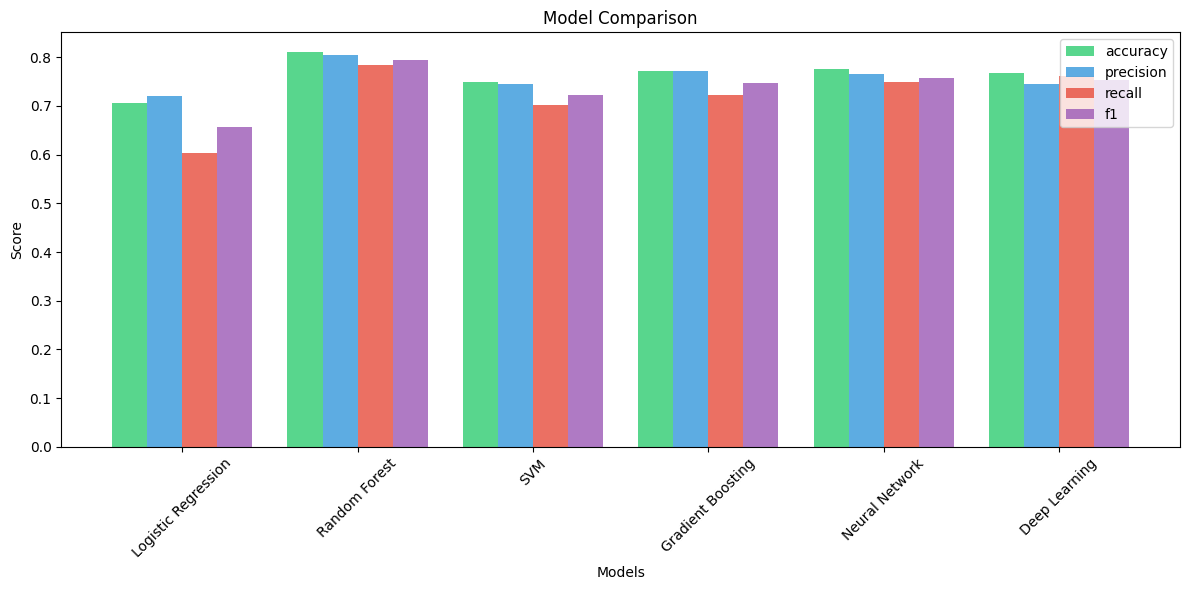

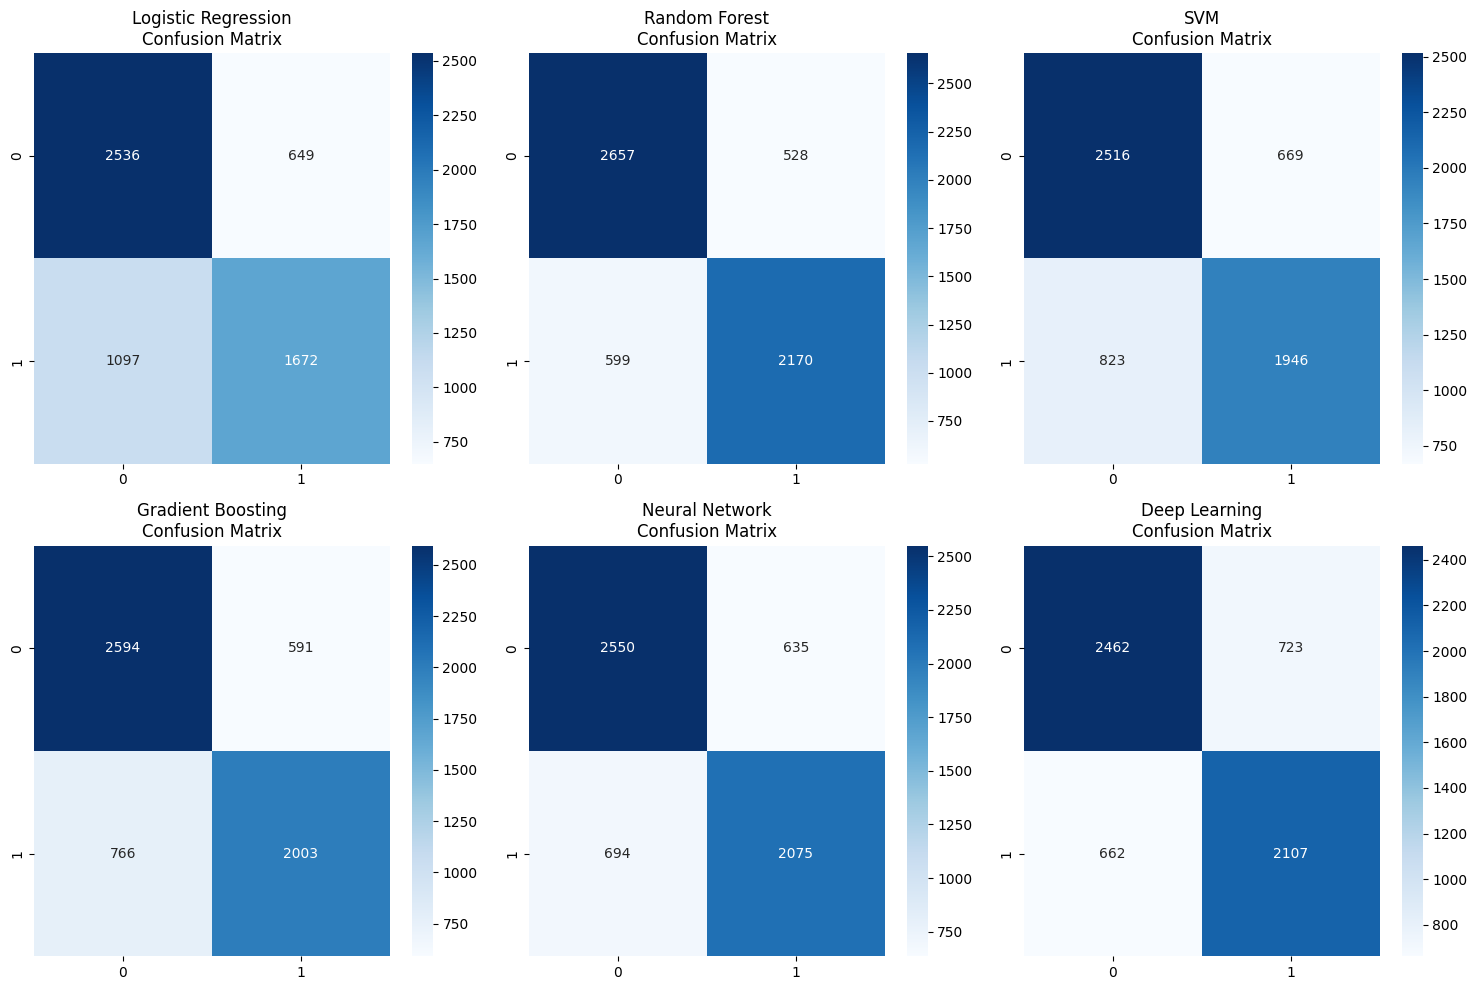

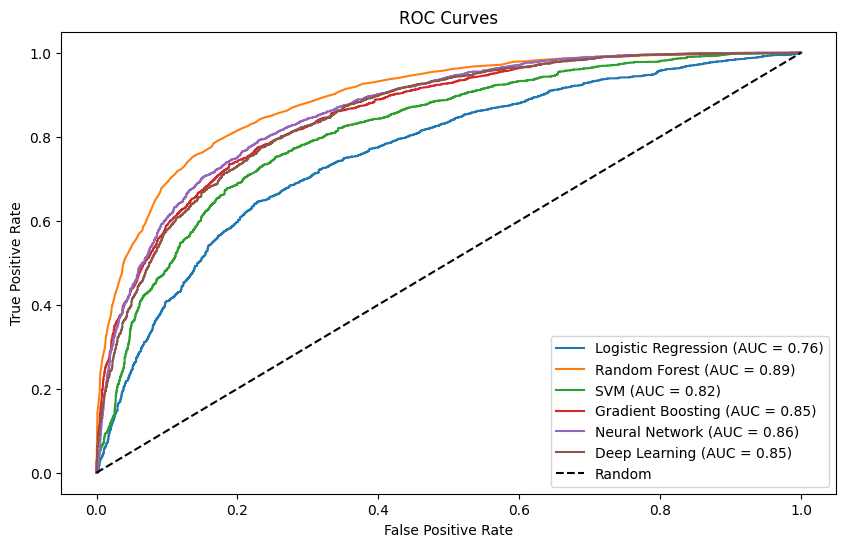

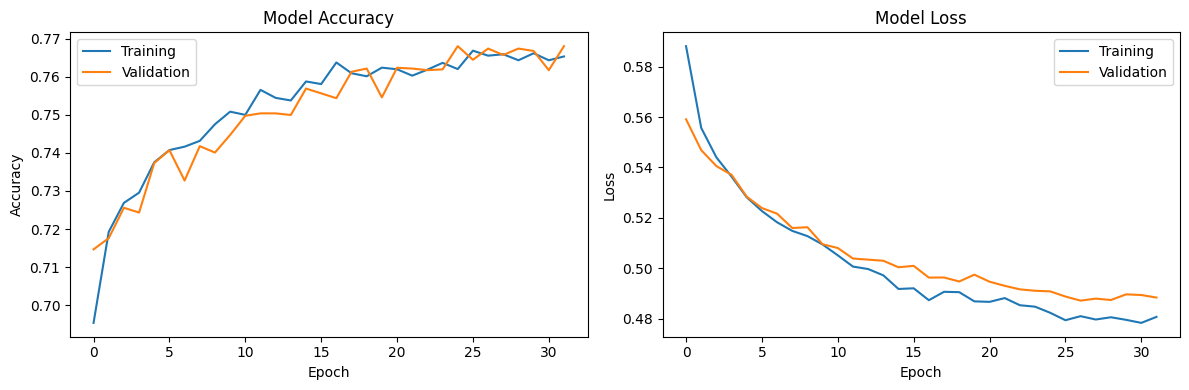


Model Performance Summary:

                      Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.7068     0.7204  0.6038    0.6570
Random Forest          0.8107     0.8043  0.7837    0.7939
SVM                    0.7494     0.7442  0.7028    0.7229
Gradient Boosting      0.7721     0.7722  0.7234    0.7470
Neural Network         0.7768     0.7657  0.7494    0.7574
Deep Learning          0.7674     0.7445  0.7609    0.7526


In [50]:
selected_features = [
    'digits_ratio', 'special_chars_ratio', 'body_digits', 'has_url', 'subject_length'
    # , 'body_length', 'subject_word_count', 'body_word_count', 'subject_digits', 'body_special_chars',  
]

results = classify_emails(df, selected_features)

Trying LLM Models

In [ ]:
# import pandas as pd
# import numpy as np
# from transformers import (
#     AutoTokenizer, 
#     AutoModelForSequenceClassification, 
#     TrainingArguments, 
#     Trainer
# )
# import torch
# from sklearn.model_selection import train_test_split
# from datasets import Dataset
# import evaluate
# import numpy as np

# class EmailTransformerClassifier:
#     def __init__(self, model_name="distilbert-base-uncased"):
#         """
#         Initialize transformer classifier
#         model_name: name of the pretrained model to use
#         """
#         self.model_name = model_name
#         self.tokenizer = AutoTokenizer.from_pretrained(model_name)
#         self.model = AutoModelForSequenceClassification.from_pretrained(
#             model_name,
#             num_labels=2
#         )
#         self.trainer = None
        
#     def prepare_data(self, df):
#         """Prepare data for transformer model"""
#         # Combine subject and body text
#         df['text'] = df['subject'] + " " + df['body']
        
#         # Split data
#         train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)
        
#         # Convert to HuggingFace datasets
#         train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
#         eval_dataset = Dataset.from_pandas(eval_df[['text', 'label']])
        
#         # Tokenize data
#         def tokenize_function(examples):
#             return self.tokenizer(
#                 examples['text'],
#                 padding='max_length',
#                 truncation=True,
#                 max_length=512
#             )
        
#         train_dataset = train_dataset.map(tokenize_function, batched=True)
#         eval_dataset = eval_dataset.map(tokenize_function, batched=True)
        
#         return train_dataset, eval_dataset
    
#     def compute_metrics(self, eval_pred):
#         """Compute metrics for evaluation"""
#         metric = evaluate.load("accuracy")
#         f1_metric = evaluate.load("f1")
#         precision_metric = evaluate.load("precision")
#         recall_metric = evaluate.load("recall")
        
#         logits, labels = eval_pred
#         predictions = np.argmax(logits, axis=-1)
        
#         return {
#             'accuracy': metric.compute(predictions=predictions, references=labels)['accuracy'],
#             'f1': f1_metric.compute(predictions=predictions, references=labels, average='binary')['f1'],
#             'precision': precision_metric.compute(predictions=predictions, references=labels, average='binary')['precision'],
#             'recall': recall_metric.compute(predictions=predictions, references=labels, average='binary')['recall']
#         }
    
#     def train(self, train_dataset, eval_dataset, 
#               output_dir="./transformer_results",
#               num_train_epochs=3,
#               per_device_train_batch_size=8,
#               per_device_eval_batch_size=8):
#         """Train the transformer model"""
        
#         training_args = TrainingArguments(
#             output_dir=output_dir,
#             num_train_epochs=num_train_epochs,
#             per_device_train_batch_size=per_device_train_batch_size,
#             per_device_eval_batch_size=per_device_eval_batch_size,
#             evaluation_strategy="epoch",
#             save_strategy="epoch",
#             load_best_model_at_end=True,
#             push_to_hub=False,
#         )
        
#         self.trainer = Trainer(
#             model=self.model,
#             args=training_args,
#             train_dataset=train_dataset,
#             eval_dataset=eval_dataset,
#             compute_metrics=self.compute_metrics,
#         )
        
#         print("Training transformer model...")
#         train_results = self.trainer.train()
        
#         return train_results
    
#     def evaluate(self, eval_dataset):
#         """Evaluate the model"""
#         if self.trainer is None:
#             raise ValueError("Model hasn't been trained yet!")
            
#         print("\nEvaluating model...")
#         metrics = self.trainer.evaluate(eval_dataset)
        
#         return metrics
    
#     def predict(self, texts):
#         """Make predictions on new texts"""
#         if self.trainer is None:
#             raise ValueError("Model hasn't been trained yet!")
            
#         # Tokenize texts
#         inputs = self.tokenizer(
#             texts,
#             padding='max_length',
#             truncation=True,
#             max_length=512,
#             return_tensors="pt"
#         )
        
#         # Get predictions
#         with torch.no_grad():
#             outputs = self.model(**inputs)
#             predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
            
#         return predictions.numpy()

# def train_transformer_model(df):
#     """Main function to train and evaluate transformer model"""
#     # Initialize classifier
#     classifier = EmailTransformerClassifier()
    
#     # Prepare data
#     print("Preparing data...")
#     train_dataset, eval_dataset = classifier.prepare_data(df)
    
#     # Train model
#     print("\nTraining model...")
#     train_results = classifier.train(train_dataset, eval_dataset)
    
#     # Evaluate model
#     print("\nEvaluating model...")
#     eval_results = classifier.evaluate(eval_dataset)
    
#     # Print results
#     print("\nTraining Results:")
#     print(train_results)
#     print("\nEvaluation Results:")
#     print(eval_results)
    
#     return classifier, train_results, eval_results

# if __name__ == "__main__":
#     # Train transformer model
#     classifier, train_results, eval_results = train_transformer_model(df)
    
#     # Make predictions on new examples
#     sample_texts = [
#         "Urgent: Your account needs verification",
#         "Meeting schedule for tomorrow",
#         "Click here to claim your prize money",
#         "Project update: Sprint review notes"
#     ]
    
#     predictions = classifier.predict(sample_texts)
#     for text, pred in zip(sample_texts, predictions):
#         print(f"\nText: {text}")
#         print(f"Probability of phishing: {pred[1]:.4f}")

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.


In [55]:
df.head(1)


,subject,body,label,subject_length,body_length,subject_word_count,body_word_count,subject_body_ratio,subject_cleaned,body_cleaned
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0,25.0,58,7.0,15,0.431034,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls ) - hpln...


In [60]:
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

class LLMEmailClassifier:
    def __init__(self, model_name="facebook/roberta-hate-speech-dynabench-r4-target"):
        """
        Initialize the classifier with a HuggingFace model
        Default model is RoBERTa, but you can specify others
        """
        self.classifier = pipeline(
            task="text-classification",
            model=model_name,
            device=-1  # Use CPU. Set to 0 if you want to use GPU
        )
    
    def _prepare_email_text(self, subject, body):
        """Combine subject and body for classification"""
        return f"Subject: {subject}\n\nBody: {body}"
    
    def classify_single_email(self, subject, body):
        """
        Classify a single email using the model
        Returns 1 for phishing, 0 for legitimate
        """
        try:
            email_text = self._prepare_email_text(subject, body)
            
            # Get prediction
            result = self.classifier(email_text, max_length=512, truncation=True)
            
            # Most models return 'LABEL_0' or 'LABEL_1'
            # We'll map the negative class (LABEL_0) to legitimate (0)
            # and positive class (LABEL_1) to phishing (1)
            prediction = 1 if result[0]['label'] == 'LABEL_1' else 0
            confidence = result[0]['score']
            
            return prediction, confidence
            
        except Exception as e:
            print(f"Error classifying email: {e}")
            return None, None

    def classify_dataset(self, df, subject_col='subject', body_col='body', 
                        batch_size=32):
        """
        Classify a dataset of emails
        """
        predictions = []
        confidences = []
        
        # Process in batches
        for i in tqdm(range(0, len(df), batch_size)):
            batch = df.iloc[i:i+batch_size]
            
            batch_predictions = []
            batch_confidences = []
            for _, row in batch.iterrows():
                pred, conf = self.classify_single_email(
                    row[subject_col],
                    row[body_col]
                )
                batch_predictions.append(pred)
                batch_confidences.append(conf)
            
            predictions.extend(batch_predictions)
            confidences.extend(batch_confidences)
        
        return predictions, confidences

def compare_classifications(df, llm_predictions, llm_confidences, true_label_col='label'):
    """
    Compare LLM predictions with original labels
    """
    # Convert predictions to numpy array
    llm_preds = np.array(llm_predictions)
    true_labels = df[true_label_col].values
    
    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(true_labels, llm_preds))
    
    # Create confusion matrix
    conf_matrix = confusion_matrix(true_labels, llm_preds)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    # Calculate agreement percentage
    agreement = (llm_preds == true_labels).mean() * 100
    print(f"\nAgreement with original labels: {agreement:.2f}%")
    
    # Add predictions to dataframe
    results_df = df.copy()
    results_df['llm_prediction'] = llm_preds
    results_df['llm_confidence'] = llm_confidences
    results_df['agreement'] = llm_preds == true_labels
    
    # Analysis of high confidence vs low confidence predictions
    high_conf_mask = np.array(llm_confidences) > 0.9
    if high_conf_mask.any():
        high_conf_agreement = (llm_preds[high_conf_mask] == true_labels[high_conf_mask]).mean() * 100
        print(f"\nAgreement for high confidence predictions (>0.9): {high_conf_agreement:.2f}%")
    
    return results_df


# Initialize the classifier
classifier = LLMEmailClassifier()
# classifier = LLMEmailClassifier("microsoft/deberta-v3-base")

# Classify the dataset
predictions, confidences = classifier.classify_dataset(
    df,
    subject_col='subject',  
    body_col='body',
    batch_size=32 
)

# Compare with original labels
results_df = compare_classifications(df, predictions, confidences, true_label_col='label')

# Save results
results_df.to_csv('llm_classification_results.csv', index=False)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
Device set to use -1
100%|██████████| 931/931 [5:39:49<00:00, 21.90s/it]      



Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69     15791
           1       0.00      0.00      0.00     13976

    accuracy                           0.53     29767
   macro avg       0.27      0.50      0.35     29767
weighted avg       0.28      0.53      0.37     29767


Confusion Matrix:
[[15791     0]
 [13976     0]]

Agreement with original labels: 53.05%

Agreement for high confidence predictions (>0.9): 55.58%


In [59]:
!pip install tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 938.0 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
